# **Predicting Medical Appointment No-Shows: A Data-Driven Approach**



# Part 1: Introduction

Medical appointment no-shows are a persistent issue in healthcare, leading to inefficiencies, increased costs, and poorer health outcomes. Our team set out to explore how various factors influence a patient's likelihood of missing a scheduled medical appointment. Our objective is to build a predictive model that identifies patients at higher risk of not attending their scheduled appointments, with the hopes of enabling healthcare providers to take additional proactive steps to encourage their patients to actually show up for their appointments. This would enable more efficient resource allocation, reducing the financial losses, and improve appointment turnout. We find this project compelling because it would allow us to understand the effects of demographics, location (and living conditions), health conditions, and patient engagement on no-show appointments, ultimately helping providers identify when additional interventions could improve attendance and enhance patient outcomes in the healthcare system.

Our dataset consists of 110,527 medical appointments and 14 characteristics from Vitória Brazil. We are trying to predict whether a patient shows up to their appointment or does not based on the 13 other variables.

For data exploration, it's essential to check the types of the variables, summarize the statistics, and understand the distribution of key variables. Below are the steps you can take:

The variables in our dataset are as follow:

*    No-show (Target Variable): Indicates whether a patient showed up for their scheduled appointment.
*   Age: The age of the patient at the time of the appointment.

*   Gender: The gender of the patient.
*   ScheduledDay: The date on which the appointment was scheduled.

*   AppointmentDay: The actual date of the appointment.

*   Hypertension: Whether the patient has hypertension.

*   Diabetes: Whether the patient has diabetes.
*   Alcoholism: Whether the patient has a history of alcoholism.

*   Handicap: Whether the patient has a physical handicap or disability.
*   SMS_received: Indicates whether the patient received an SMS reminder about the appointment.


*   Government Aid Recipient: Whether the patient is enrolled in a government or healthcare program that provides financial assistance for medical treatment.
*   Neighborhood: The neighborhood in which the patient lives.

We have the following data types:

*   Categorical variable : Gender, SMS_received, Hypertension, Diabetes, Alcoholism, Handicap, Zip Code, and No-show.
*   Continuous variables : Age, Days_in_between (engineered), and AppointmentDay.
*   Date/Time Variables: ScheduledDay and AppointmentDay (could be processed to extract useful features like the day of the week or time of day).





# Part 2: Data Loading & Preprocessing

For this step of our project, we will be importing the necessary libraries in order to conduct all stages of our report, including pre-processing, exploratory data analysis, data cleaning, and model selection.


We have performed some feature engineering, which may introduce important features and potentially be crucial for improving model performance:


*   Days_in_between: This feature can provide insight into how far in advance appointments are made and its potential relationship with no-shows. It can capture the urgency or planning behavior of patients.
*   Zip Code: Geographical data can be important for modeling appointment attendance. It may be necessary to encode the zip code in a way that captures meaningful patterns (e.g., grouping zip codes into broader regions if necessary).
*   Latitude/Longitude: Geographical coordinates used to plot Neighborhoods onto ineractive map of Vitória, Brazil

## 2.1: Importing the neccessary libraries

We will start by importing the relevant libraries for our report (for all parts of the report).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from scipy.stats import randint

## 2.2 Loading Data into Pandas Dataframe

We will begin by reading our dataset, which we have uploaded to a GitHub repository that we created for the purpose of this project. We decided to do this so that we would not need to create a new working directory within our project directory.

In [ ]:
# Loading Data from GitHub repository
github_url = 'https://raw.githubusercontent.com/suha-memon/CIS5500FinalProject/main/HealthcareNoShowDataset.csv'
# Saving data into Pandas Dataframe called data
raw_data = pd.read_csv(github_url)
data = raw_data.copy()

## 2.3 Analyzing Data Structure

In order to better understand the original data, we decided to calculate the summary statistics, measures of central tendency, and better understand our data overall.

In [ ]:
print("Rows in the dataset:", data.shape[0])
print("Columns in the dataset:", data.shape[1])

Rows in the dataset: 110527
Columns in the dataset: 14


In [ ]:
# Daraframe info: not-null count and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can observe from the output above, our dataset has the following data types for the columns
- Object:
  - Gender
  - ScheduledDay
  - AppointmentDay
  - Neighborhood
  - No-show
- Numerical:
  - PatientID
  - AppointemntID
  - Age
  - Scholarship
  - Hypertension
  - Diabetes
  - Alcoholism
  - Handicap
  - SMS received

In [ ]:
# Descriptive Statistics for our Dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the descriptive statistics, we can observe the following information about our data
- The average age of patients in our dataset is 37 years old
  - The minimum age is -1, which is an invalid age. This indicates data cleaning will need to be doen to ensure we have only rows with valid ages.
- About 7% of the appointments scheduled are by patients with diabetes
- About 3% of the appointments scheduled are by patients who struggle with alcoholism
- About 32% of the appointments received an SMS message prior to their appointments.

In [ ]:
# First 10 rows of our data
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



Now that we have a general overview of our data, we will dive deeper into the individual variables to ensure that all of our data is properly represented. We will clean our data, rename some of the columns to their correpsonding English spellings (for interpretability), and we will also convert some of the datatypes to make them ready to be processed.

## 2.4 Renaming Columns

Now that we have completed an initial exploration of our data, we will start by correcting the names of our variables, ensuring that they are correctly spelled for better interpretability.

Since ScheduledDay and AppointmentDay are actually dates, we will rename these columns approproately. We will also fix the spelling for Handicap and correct the spellings for Hypertension and Neighborhood to align with American English.

There is a column called "Scholarship" in our data, representing the concept of [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). Bolsa Família is a social welfare program, designed to reduce poverty by providing financial aid to low-income families. It is a conditional cash transfer program, so families need to meet income requirements to receive the aid.  Since the variable name Scholarship is somewhat confusing, we will rename it to GovernmentAidRecipient



In [ ]:
# Renaming columns (for spelling and interpretability)
data.rename(columns={'Hipertension': 'Hypertension',
                     'Scholarship': 'GovernmentAidRecipient',
                     'Neighbourhood': 'Neighborhood',
                     'ScheduledDay': 'ScheduledDate',
                     'AppointmentDay': 'AppointmentDate',
                     'SMS_received': 'SMSReceived',
                     'PatientId': 'PatientID',
                     'Handcap': 'Handicap'}, inplace=True)

## 2.5 Changing Variable Types

In order to explore our data properly and create any models, we need to make sure that our column datatypes align with our understanding of what they should be. We will start by changing the ScheduledD

In [ ]:
# Change Appointment Day/Dates:

# Add column Scheduled Time [will later be converted to morning/afternoon]
data['ScheduledTime'] = pd.to_datetime(data['ScheduledDate']).dt.time
data['ScheduledDate'] = pd.to_datetime(data['ScheduledDate']).dt.date
data['AppointmentTime'] = pd.to_datetime(data['AppointmentDate']).dt.time
data['AppointmentDate'] = pd.to_datetime(data['AppointmentDate']).dt.date
# Add column called Scheduled Day to determine the day of the week of the appointment
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDate']).dt.day_name()
data['AppointmentDay'] = pd.to_datetime(data['ScheduledDate']).dt.day_name()

## 2.6 Feature Engineering Part 1: DaysBetween: Days between ScheduledDate and AppointmentDate

Based on our existing variables, we will now create a new variable that reflects the number of days in between our appointments: DaysBetween denotes the number of days that elapsed between when the individual scheduled the appointment to when the appointment actually was.

We suspect, based on additional reading about medical appointment no-shows, that the number of days in between when a person scheduled the appointment and the appointment date are could impact whether they show up to their appointment. We create the new variable below.

In [ ]:
# Feature Engineering: DaysBetween
data['DaysBetween'] = (data['AppointmentDate'] - data['ScheduledDate'])

We will now transform values in the DaysBetween column to only contain the day integer

In [ ]:
data['DaysBetween'] = data['DaysBetween'].apply(lambda x: x.days)

## 2.7 Converting Handicap Variable into a Binary Variable

We will now change the Handicap column to be a binary variable so that we can better understand whether an individual patient is handicapped or not, as opposed to their specific extremeity of being handicapped.

In [ ]:
# Observing the Handicap attribute
data['Handicap'].value_counts()

,count
Handicap,
0,108286
1,2042
2,183
3,13
4,3


Our data has levels of handicaped indiviudals from 1 to 4, so we will caste the values 2-4 to be 1, so that we can treat Handicap as a binary variable

In [ ]:
# Converting Handicap values >=1 to 1
data.loc[data['Handicap'] >= 1, 'Handicap'] = 1

In [ ]:
data['Handicap'].value_counts()

,count
Handicap,
0,108286
1,2241


## 2.8 Dropping Null and Invalid Rows

We will now drop the NULL and invalid rows in our data.

In [ ]:
num_na_rows = data.isna().any(axis=1).sum()
print(f"Number of rows with missing values: {num_na_rows}")
# drop all null rows
data.dropna(inplace=True)

Number of rows with missing values: 0


There are no rows with missing values, but we still have some rows that we need to examine closely based on our initial exploration of the data. We will start by observing the age variable, since we previously saw a minimum age value of -1, which doesn't make sense.

In [ ]:
# Determine number of rows with age less than 0
rows_with_negative_age = data[data['Age'] < 0].shape[0]
print(f"Number of rows with age less than 0: {rows_with_negative_age}")

Number of rows with age less than 0: 1


In [ ]:
data = data[data['Age'] >= 0]

## 2.9 Dropping Duplicate Rows

We will drop the rows in our dataset that are duplicated so that we know we are exploring rows for each real appointment, without double-counting appointments.

In [ ]:
# Entire rows that are duplicated:
data.duplicated().sum()

0

There are no rows that are entirely duplicated, but there might be rows that are hidden duplicates. This is likely due to the AppointmentIDs being flagged as unique.

In other words, there might be rows that have the same PatientID, AppointmentDate, ScheduledDate, and No-show status. These rows would represent the same actual doctor's appointment (duplicated appointment records), but these would not be flagged immediately as duplicate rows due to having different documented IDs. We want to remove these rows.

In [ ]:
duplicate_rows = data.duplicated(subset=['PatientID', 'AppointmentDate', 'ScheduledDate', 'ScheduledTime', 'No-show'])

# Count the number of duplicate rows
duplicate_count = duplicate_rows.sum()
duplicate_count

1305

In [ ]:
data.shape

(110526, 19)

As we can see, there are 1,305 duplicated rows (rows that have the same PatientID, AppointmentDate, ScheduledDate, ScheduledTime, and No-show status). Therefore, we want to drop these rows so that we only have unique appointments in our data.

Our data has levels of handicaped indiviudals from 1 to 4, so we will caste the values 2-4 to be 1, so that we can treat Handicap as a binary variable

In [ ]:
data.drop_duplicates(subset=['PatientID', 'AppointmentDate', 'ScheduledDate', 'ScheduledTime', 'No-show'], keep='first', inplace=True)

In [ ]:
data.shape

(109221, 19)

In [ ]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighborhood,GovernmentAidRecipient,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,ScheduledTime,AppointmentTime,ScheduledDay,AppointmentDay,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,00:00:00,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,00:00:00,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,00:00:00,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,00:00:00,Friday,Friday,0


Our data now contains 109,221 rows with 19 columns. We are now ready for Exploratory Data Analysis.

## 2.10 Observing Presence/Absence of Outliers
We will now observe whether there are any outliers in our data.


In [ ]:
data

,PatientID,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighborhood,GovernmentAidRecipient,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,ScheduledTime,AppointmentTime,ScheduledDay,AppointmentDay,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,00:00:00,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,00:00:00,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,00:00:00,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,00:00:00,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,09:15:35,00:00:00,Tuesday,Tuesday,35
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,07:27:33,00:00:00,Tuesday,Tuesday,35
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,16:03:52,00:00:00,Wednesday,Wednesday,41
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,15:09:23,00:00:00,Wednesday,Wednesday,41


In [ ]:
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Drop specified columns
columns_to_drop = ['PatientID', 'AppointmentID', 'GovernmentAidRecipient', 'Diabetes', 'Alcoholism', 'Handicap']
numeric_data = numeric_data.drop(columns=columns_to_drop, errors='ignore')

# Compute Z-scores for remaining numeric columns
z_scores = np.abs((numeric_data - numeric_data.mean()) / numeric_data.std())

# Threshold: 3
threshold = 3
outliers = (z_scores > threshold)

# Get a list of columns with outliers
outlier_columns = outliers.any().loc[lambda x: x].index.tolist()

# Print the columns with outliers
print("Columns with outliers:")
for column in outlier_columns:
    print(column)

Columns with outliers:
Age
DaysBetween


In [ ]:
outlier_rows_for_age = data[outliers['Age']]
print("\nOutlier rows for column 'Age':")
print(outlier_rows_for_age)


Outlier rows for column 'Age':
          PatientID  AppointmentID Gender ScheduledDate AppointmentDate  Age  \
63912  3.196321e+13        5700278      F    2016-05-16      2016-05-19  115   
68127  3.196321e+13        5562812      F    2016-04-08      2016-05-16  115   
76284  3.196321e+13        5744037      F    2016-05-30      2016-05-30  115   
97666  7.482346e+14        5717451      F    2016-05-19      2016-06-03  115   

      Neighborhood  GovernmentAidRecipient  Hypertension  Diabetes  \
63912   ANDORINHAS                       0             0         0   
68127   ANDORINHAS                       0             0         0   
76284   ANDORINHAS                       0             0         0   
97666     SÃO JOSÉ                       0             1         0   

       Alcoholism  Handicap  SMSReceived No-show ScheduledTime  \
63912           0         1            0     Yes      09:17:44   
68127           0         1            0     Yes      14:29:17   
76284           0 

There appear to be two individuals who are 115 years old in our data. Those are our two outlier values.

In [ ]:
outlier_rows_for_days_between = data[outliers['DaysBetween']]
print("\nOutlier rows for column 'DaysBetween':")
print(outlier_rows_for_days_between)


Outlier rows for column 'DaysBetween':
           PatientID  AppointmentID Gender ScheduledDate AppointmentDate  Age  \
285     6.342844e+10        5430959      F    2016-03-04      2016-04-29   20   
476     4.414826e+13        5408325      F    2016-02-29      2016-04-29   32   
702     1.465346e+12        5387722      F    2016-02-24      2016-04-29    3   
703     1.363294e+13        5387715      M    2016-02-24      2016-04-29    3   
712     2.963275e+14        5377051      M    2016-02-22      2016-04-29   29   
...              ...            ...    ...           ...             ...  ...   
110335  3.747953e+11        5338761      M    2016-02-11      2016-06-01    0   
110337  1.527666e+12        5538233      M    2016-04-01      2016-06-01    2   
110350  9.434693e+13        5510680      F    2016-03-28      2016-06-01   50   
110351  4.483937e+13        5371807      F    2016-02-19      2016-06-01   27   
110352  1.212525e+12        5476901      F    2016-03-16      2016-06

Outlier Analysis for DaysBetween:

2,604 rows were identified as outliers for the DaysBetween variable using a z-score threshold of 3. These rows represent appointments scheduled significantly far in advance or with unusually long lead times. We believe that this actually may give us important inofrmation about scheduling behavior, so we have decided to keep these values for further analysis.

## SUMMARY:

In the data loading and preprocessing stage, we imported the necessary libraries, such as pandas and numpy, to handle data manipulation and transformation. We loaded the dataset into a pandas DataFrame and conducted an initial analysis to examine the structure, column types, and distributions of the data. We renamed columns for clarity and consistency and adjusted variable types as needed, such as converting categorical variables to category type and date columns to datetime type. We handled missing or invalid values by dropping rows with null entries and removing any duplicates to ensure the dataset was clean and suitable for model training.


# Part 3: Exploratory Data Analysis (EDA)

We will begin our Exploratory Data Analysis by observing the variables in our dataset. We will start with a simple histogram of the variables in our data. We will then observing the Patients and move on to observing how the variables relate to the target variable, whether the patient did not show up to their appointment.

array([[<Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'GovernmentAidRecipient'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handicap'}>,
        <Axes: title={'center': 'SMSReceived'}>],
       [<Axes: title={'center': 'DaysBetween'}>, <Axes: >, <Axes: >]],
      dtype=object)

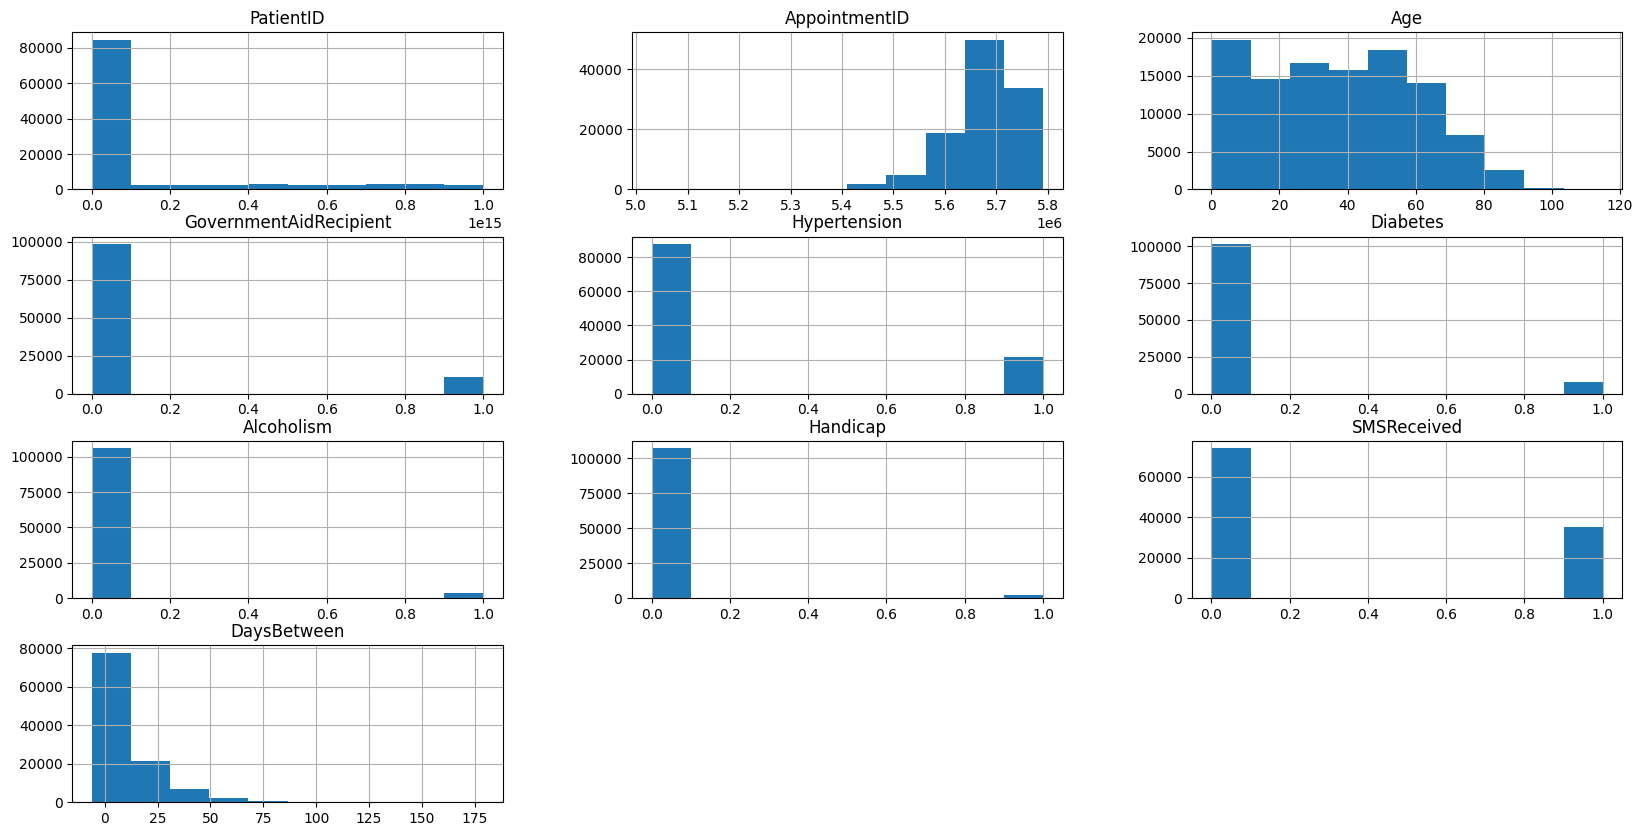

In [ ]:
data.hist(figsize=(20,10))

In [ ]:
# Unique patients in our dataset
data.PatientID.nunique()

62298

In [ ]:
# Average appointments per patient
len(data) / data.PatientID.nunique()

1.7532023499951845

As we can see, there are 62,298 unique patients that scheduled appointments, meaning that on average, each patient scheudled 1.77 apointments

In [ ]:
data.PatientID.duplicated().sum()

46923

There are 46,923 patients that have made more than 1 appointment

In [ ]:
data.duplicated(['PatientID', 'No-show']).sum()

37405

There are 37,405 patients that have had greater than 1 no-show after scheduling an appointment

In [ ]:
# Different AppointmentTimes in our Data
data['AppointmentTime'].value_counts()


,count
AppointmentTime,
00:00:00,109221


Upon inspecting our data, we can observe that the AppointmentTime is 00:00:00 for all appointments, meaning that the column is not giving us any helpful information. Therefore, we will drop this column later.

In [ ]:
# Different ScheduledTimes in our Data
data['ScheduledTime'].value_counts()

,count
ScheduledTime,
07:09:54,31
07:09:53,26
17:17:46,24
17:18:27,22
07:52:31,22
...,...
16:53:40,1
10:32:22,1
14:16:53,1


## 3.1 Plotting and Observing Variables

Below, we will be observing the different variables that are present in our dataset. We will show observe the variables, create a visualization for each, and note the patterns present

### 3.1.1 Understanding Our Target Variable: Class Imbalance

To understand whether our data is imbalanced, we will plot the instances of positively classified data vs negatively classified data: appointment no-shows (1) vs shows (0).

In [ ]:
data['No-show'].value_counts()

,count
No-show,
No,87343
Yes,21878


In [ ]:
counts = data['No-show'].value_counts()
counts["Yes"]/(counts["Yes"]+counts["No"])

0.20030946429715898

As we can see from the numbers above, there is a clear imbalance in our data, with 20% of no shows among patients. We will plot this imbalance as well.

Text(0.5, 1.0, 'No-shows vs Shows Counts')

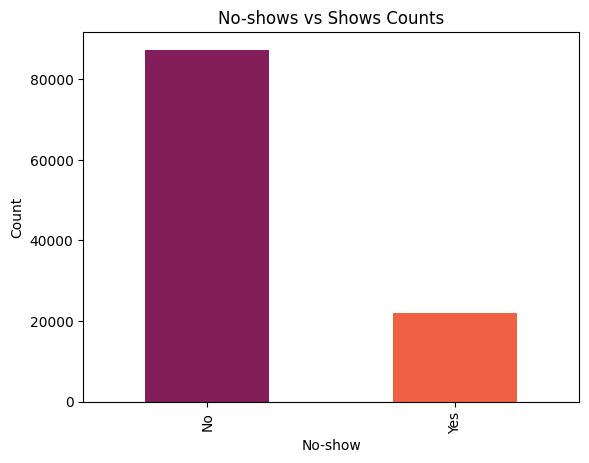

In [ ]:
# Plot the counts
counts.plot(kind='bar', color=sns.color_palette("rocket", 2), legend=False)
plt.xlabel("No-show")
plt.ylabel("Count")
plt.title("No-shows vs Shows Counts")

**Figure1**: This bar chart compares the total counts of "No-shows" (people who missed their appointments) versus "Shows" (people who attended their appointments). The chart highlights an imbalance, where most scheduled appointments were not attended, possibly pointing to an issue that could be further analyzed to identify factors contributing to no-shows.

### 3.1.2 Age
We will now observe the age distribution of our data.

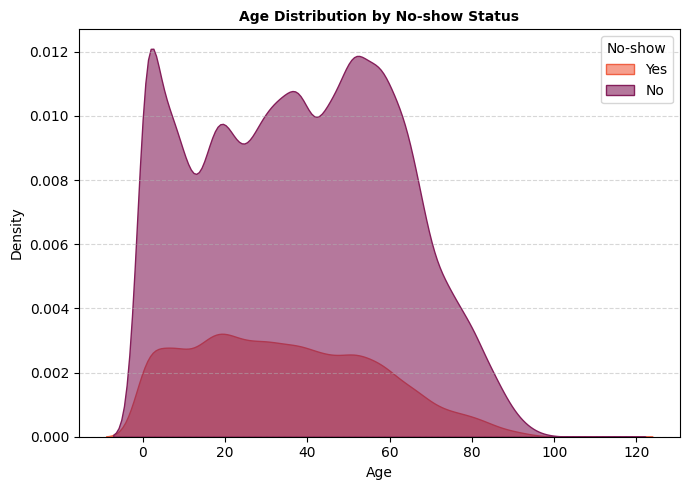

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(7, 5))
# Plot a kernel density estimate (KDE) to show the distribution of the "Age" variable
sns.kdeplot(data=data, x="Age", hue="No-show", fill=True, palette="rocket", alpha=0.6)

# Add labels and title
# Add a descriptive title for the plot
plt.title("Age Distribution by No-show Status", fontsize=10, fontweight="bold")
plt.xlabel("Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
# Add a legend to distinguish between "No" and "Yes" in the "No-show" category
plt.legend(title="No-show", labels=["Yes", "No"])
# Add a grid to the y-axis for easier interpretation of density values
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()
# Display the plot
plt.show()

**Figure 2:** is a Kernel Density Estimate (KDE) plot to visualize the age distribution for individuals grouped by their No-show status (whether they showed up for their medical appointment or not).Younger patients (particularly children) are the most represented group for appointments. While no-shows exist across all ages, they seem to mirror the general distribution of appointments but at a lower scale. Both distributions gradually decline as age increases, with very few patients in the older age groups (above 80).

<ipython-input-38-0e1532845db1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_rates = plotting_data.groupby("AgeGroup")["No-show"].value_counts(normalize=True).unstack() * 100


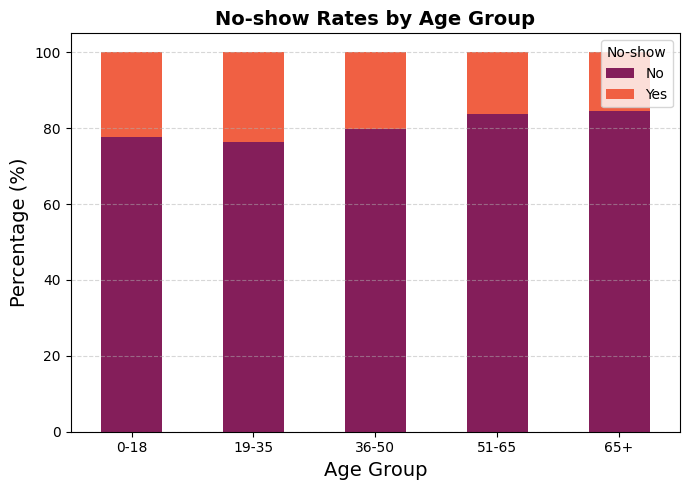

In [ ]:
plotting_data = data.copy()
bins = [0, 18, 35, 50, 65, 100]
labels = ["0-18", "19-35", "36-50", "51-65", "65+"]
plotting_data["AgeGroup"] = pd.cut(plotting_data["Age"], bins=bins, labels=labels)

# Calculate no-show rates by age group
no_show_rates = plotting_data.groupby("AgeGroup")["No-show"].value_counts(normalize=True).unstack() * 100

# Plot no-show rates
no_show_rates.plot(kind="bar", stacked=True, figsize=(7, 5), color=sns.color_palette("rocket", 2))

# Add labels and title
# Add a descriptive title for the plot
plt.title("No-show Rates by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
# Add a legend to distinguish between "No" and "Yes" in the "No-show" category
plt.legend(title="No-show", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.grid(axis="y",linestyle="--", alpha=0.5)

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()
# Display the plot
plt.show()

**Figure 3:** This image shows a stacked bar chart titled "No-show Rates by Age Group". The chart visualizes the percentage of people who either showed up ("No-show: No") or did not show up ("No-show: Yes") for an appointment, categorized by different age groups. This chart suggests that age does not significantly affect appointment attendance, as the "No" category (those who showed up) consistently outweighs the "Yes" category (no-shows) across all groups.

### 3.1.3 Gender
We will now observe the gender distribution present in our data.

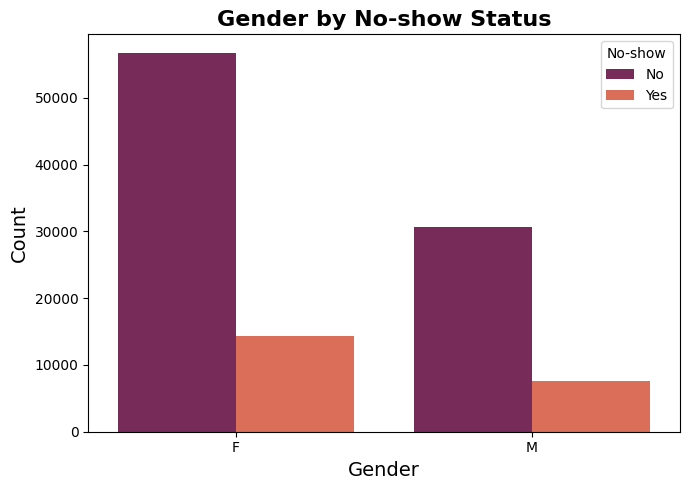

In [ ]:
# Calculate no-show rates by gender group
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Gender", hue="No-show", palette="rocket")

# Add labels and title
# Add a descriptive title for the plot
plt.title("Gender by No-show Status", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add a legend to distinguish between "No" and "Yes" in the "No-show" category
plt.legend(title="No-show", labels=["No", "Yes"])

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()
# Display the plot
plt.show()

**Figure 4:** This image is a bar chart titled "Gender by No-show Status" that shows the count of individuals who either showed up or did not show up for an appointment, categorized by gender.There are more total appointments associated with females compared to males, regardless of no-show status.
Both genders exhibit a higher count of "No-shows: No" (those who attended) than "No-shows: Yes" (those who missed their appointments), indicating that most individuals keep their appointments.
Females contribute more to the overall count of no-shows compared to males, possibly due to their higher appointment volume.

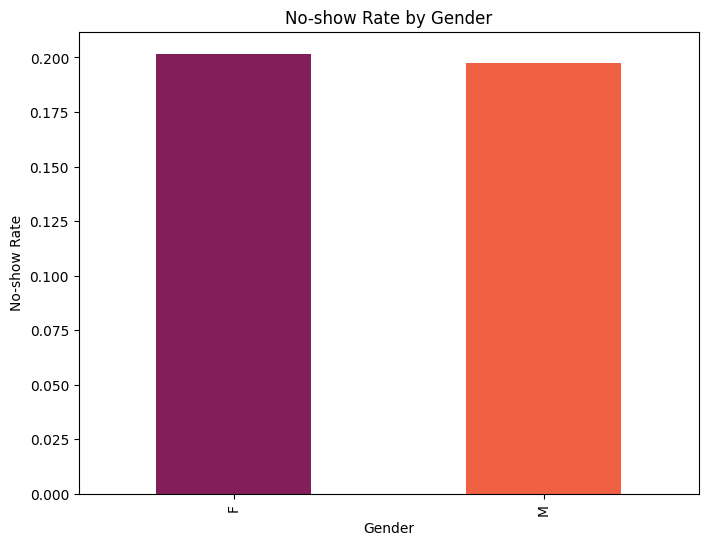

In [ ]:
# TODO:
gender_plot = data.groupby('Gender')['No-show'].apply(lambda x: x.map({'Yes': 1, 'No': 0}).mean()).plot(
    kind='bar', color=sns.color_palette("rocket", 2), figsize=(8, 6), title='No-show Rate by Gender', ylabel='No-show Rate', xlabel='Gender'
)
plt.show()

**Figure 4:** (2nd option) This visualization is used to explore whether gender has any noticeable influence on no-show behavior. From this chart, we can see that males show up more than males. The chance of males missing not showing up to an appointment is comparitively less.

### 3.1.4 Hypertension
We will now observe the gender distribution present in our data.

<ipython-input-41-629213ee5a58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hypertension', y='No-show_numeric', data=data_copy, palette="rocket", ax=axes[0]) #data parameter is added here


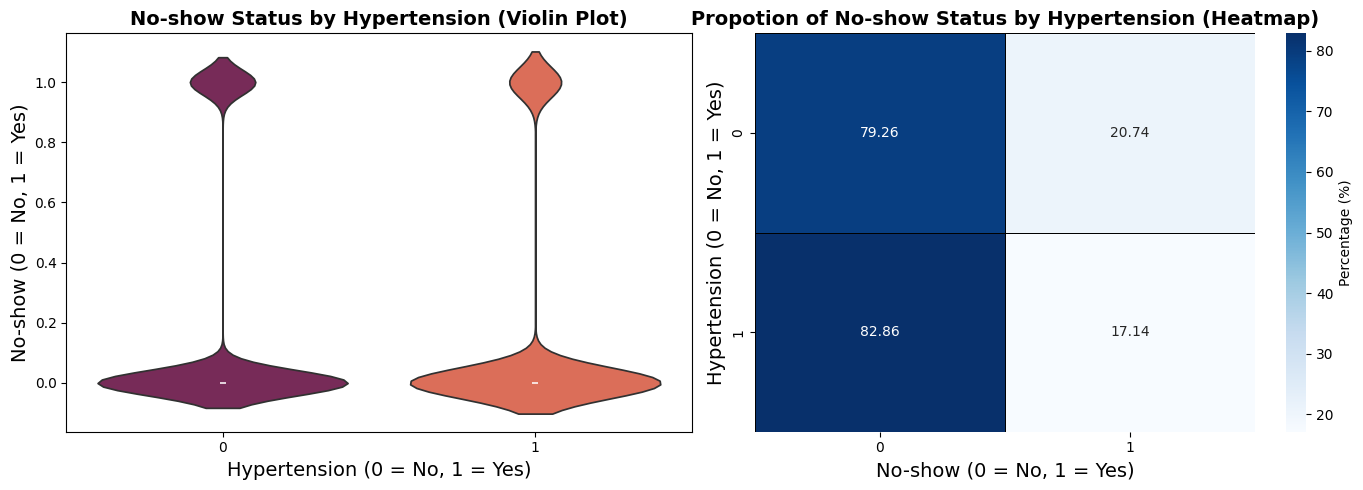

,PatientID,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighborhood,GovernmentAidRecipient,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,ScheduledTime,AppointmentTime,ScheduledDay,AppointmentDay,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,00:00:00,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,00:00:00,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,00:00:00,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,00:00:00,Friday,Friday,0


In [ ]:
# Map No-show to numeric values for plotting
data_copy = data.copy()

# Add the 'No-show_numeric' column based on 'No-show' values
data_copy['No-show_numeric'] = data_copy['No-show'].map({'No': 0, 'Yes': 1})
# Create a crosstab to calculate counts between Hypertension and No-show
hypertension_no_show = pd.crosstab(data['Hypertension'], data_copy['No-show_numeric'], normalize='index') * 100

# Create a 1x2 grid for subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First plot: Violin plot
# The 'data' parameter is now included, specifying the DataFrame to use
sns.violinplot(x='Hypertension', y='No-show_numeric', data=data_copy, palette="rocket", ax=axes[0]) #data parameter is added here
axes[0].set_title("No-show Status by Hypertension (Violin Plot)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Hypertension (0 = No, 1 = Yes)", fontsize=14)
axes[0].set_ylabel("No-show (0 = No, 1 = Yes)", fontsize=14)

# Second plot: Heatmap
sns.heatmap(hypertension_no_show, annot=True, cmap="Blues", cbar_kws={'label': 'Percentage (%)'}, fmt=".2f",
            linewidths=0.5, linecolor='black', ax=axes[1])
axes[1].set_title("Propotion of No-show Status by Hypertension (Heatmap)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("No-show (0 = No, 1 = Yes)", fontsize=14)
axes[1].set_ylabel("Hypertension (0 = No, 1 = Yes)", fontsize=14)

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()
data.head()

**Figure 5:** This image is a violin plot titled "No-show Status by Hypertension", which visualizes the distribution of no-show status (whether individuals attended their appointments or not) based on hypertension status. Both individuals with and without hypertension are more likely to show up for their appointments than to miss them.
The distribution of no-shows appears similar for both groups, though individuals without hypertension might have a slightly higher density of missing their appointments (visible as a thicker area near 1).

### 3.1.5 Diabetes
We will now observe the distribution of the diabetes variable among the patient appointments in our data.

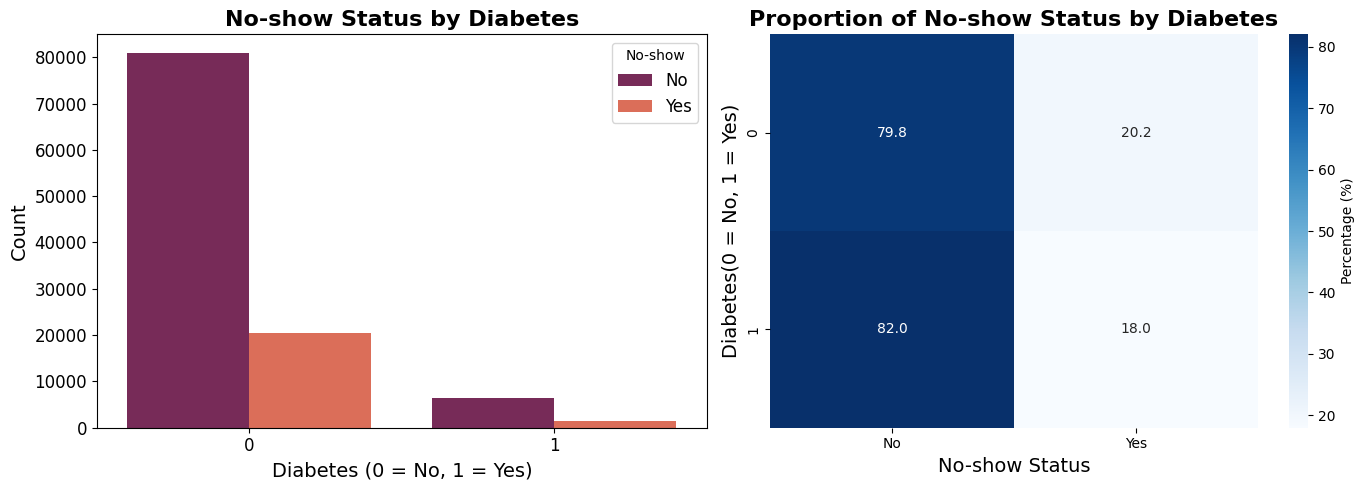

In [ ]:
# Create a figure with 1 row and 2 columns for side-by-side plots
plt.figure(figsize=(14, 5))

# Plot 1: No-show Status by Diabetes
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, first plot)
sns.countplot(data=data, x="Diabetes", hue="No-show", palette="rocket")

# Customize labels and title
plt.title("No-show Status by Diabetes", fontsize=16, fontweight="bold")
plt.xlabel("Diabetes (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="No-show", labels=["No", "Yes"], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 2: Proportion of No-show Status by Alcoholism
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, second plot)
alcoholism_counts = pd.crosstab(data['Diabetes'], data['No-show'], normalize="index") * 100
sns.heatmap(alcoholism_counts, annot=True, cmap="Blues", cbar_kws={'label': 'Percentage (%)'}, fmt=".1f")

# Add labels and title
plt.title("Proportion of No-show Status by Diabetes", fontsize=16, fontweight="bold")
plt.xlabel("No-show Status", fontsize=14)
plt.ylabel("Diabetes(0 = No, 1 = Yes)", fontsize=14)

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()


**Figure 6:** This bar chart examines the relationship between diabetes status and no-show behavior.This indicates that diabetic patients have lower overall counts in the dataset but show similar attendance patterns to non-diabetic patients.

### 3.1.6 Alcoholism
We will now observe the distribution of the alcoholism variable among the patient appointments in our data.

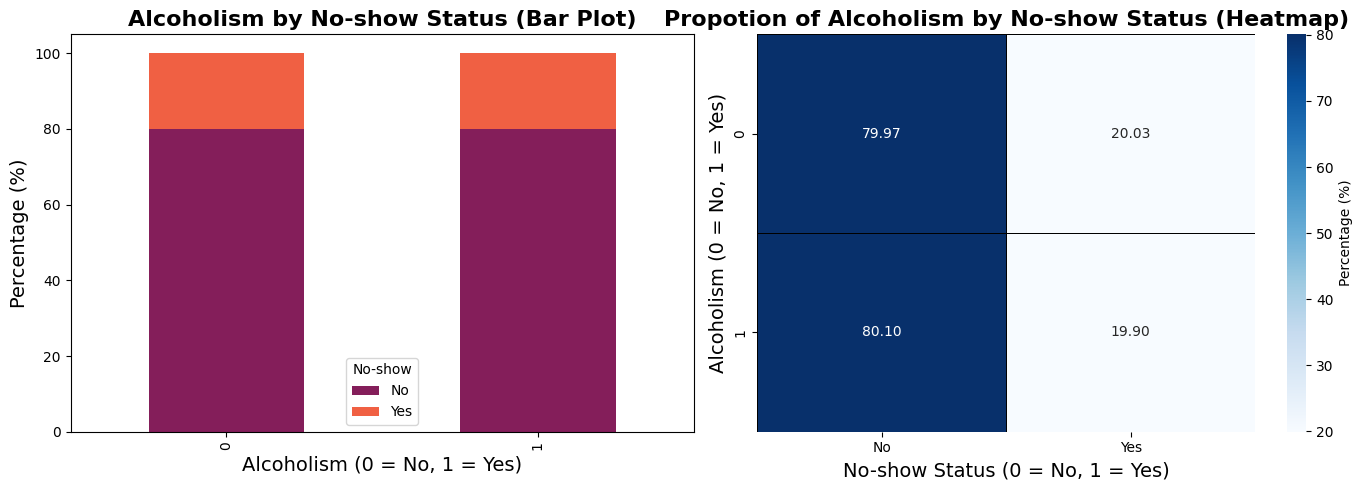

In [ ]:
# Calculate no-show rates by alcoholism group
alcoholism_counts = pd.crosstab(data['Alcoholism'], data['No-show'], normalize="index") * 100

# Create a 1x2 grid for subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First plot: Bar plot
alcoholism_counts.plot(kind="bar", stacked=True, ax=axes[0], color=sns.color_palette("rocket", 2))
axes[0].set_title("Alcoholism by No-show Status (Bar Plot)", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Alcoholism (0 = No, 1 = Yes)", fontsize=14)
axes[0].set_ylabel("Percentage (%)", fontsize=14)
axes[0].legend(title="No-show", labels=["No", "Yes"])

# Second plot: Heatmap
sns.heatmap(alcoholism_counts, annot=True, cmap="Blues", cbar_kws={'label': 'Percentage (%)'}, fmt=".2f",
            linewidths=0.5, linecolor='black', ax=axes[1])
axes[1].set_title("Propotion of Alcoholism by No-show Status (Heatmap)", fontsize=16, fontweight="bold")
axes[1].set_xlabel("No-show Status (0 = No, 1 = Yes)", fontsize=14)
axes[1].set_ylabel("Alcoholism (0 = No, 1 = Yes)", fontsize=14)

# Automatically adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()


**Figure 7:**  From the chart, it seems that the percentage of patients showing up or not showing up for appointments is fairly similar across alcoholism groups, indicating no strong correlation between alcoholism and no-show status.

### 3.1.7 SMS Received
We will now observe the distribution of the SMS Received variable among the patient appointments in our data.

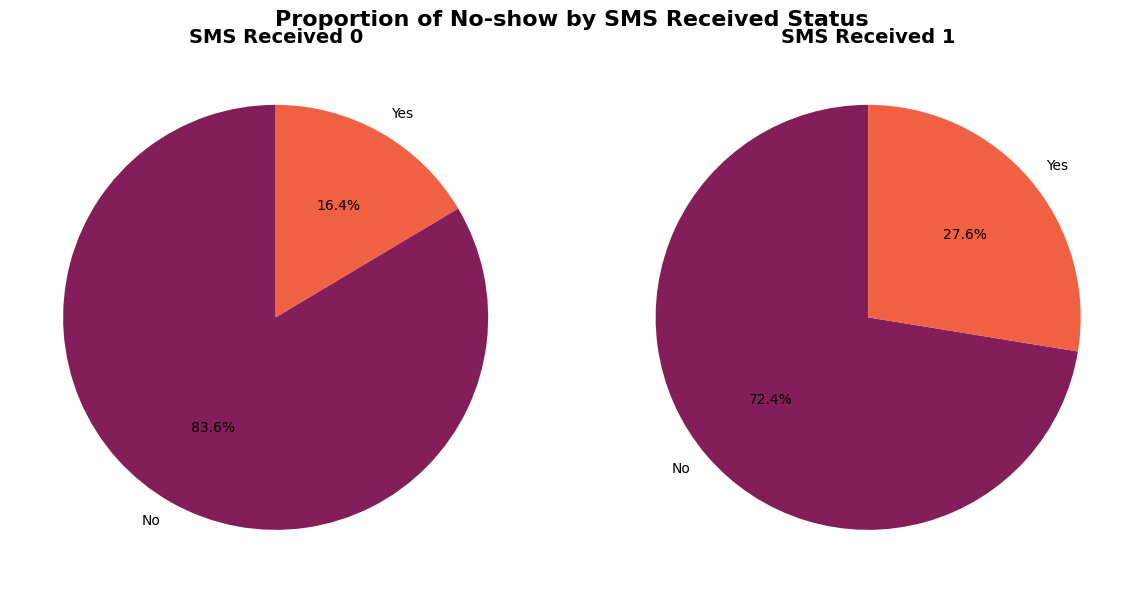

In [ ]:
# Calculate no-show rates by SMS received group
SMSReceived = pd.crosstab(data['SMSReceived'], data['No-show'], normalize="index") * 100

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for each SMS received status
for i, sms_status in enumerate(SMSReceived.index):
    SMSReceived.loc[sms_status].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("rocket", 2),
        labels=["No", "Yes"],
        legend=False,
        ax=axes[i]
    )
    # Add titles for each pie chart
    axes[i].set_title(f"SMS Received {sms_status}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("")

# Add an overall title for the figure
fig.suptitle("Proportion of No-show by SMS Received Status", fontsize=16, fontweight="bold")

# Automatically adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


**Figure 8:** The pie charts depicts the proportion of no-show appointments (Yes/No) for cases where no SMS reminders were received, with 83.4% showing up and 16.6% not showing up.This pie chart depicts the proportion of no-show appointments (Yes/No) for cases where SMS reminders were received, with 72.5% showing up and 27.5% not showing up. **It seems there is a slight negative correlation between receiving SMS and showing up to your appointment**

### 3.1.8 Government Aid
We will now observe the distribution of the GovernmentAidReceived variable among the patient appointments in our data.

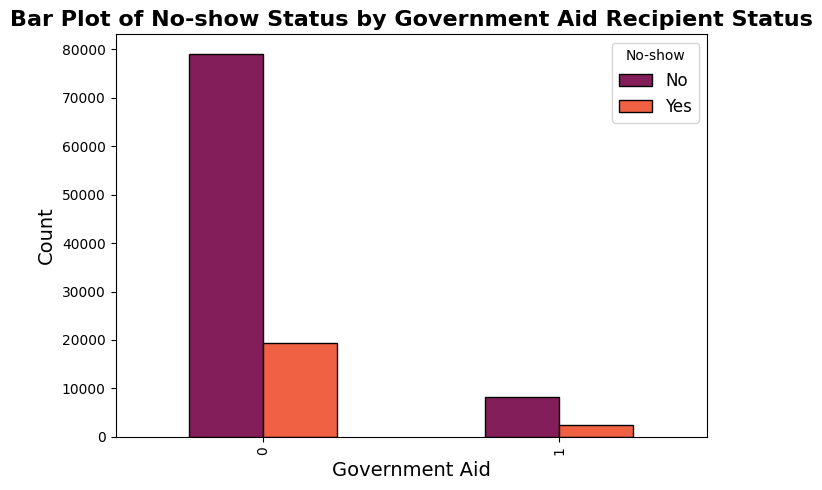

In [ ]:
# Calculate no-show rates by GovernmentAid group
gov_aid_no_show = pd.crosstab(data['GovernmentAidRecipient'], data['No-show'])

# Plot bar plot
gov_aid_no_show.plot(kind='bar',color=sns.color_palette("rocket", 2), figsize=(7, 5), edgecolor='black')

# Add title and labels
plt.title("Bar Plot of No-show Status by Government Aid Recipient Status", fontsize=16, fontweight="bold")
plt.xlabel("Government Aid", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add a legend
plt.legend(title="No-show", fontsize=12)

# Automatically adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

**Figure 9:** The plot suggests that government aid recipients and non-recipients differ in their no-show behavior, with non-recipients contributing the majority of observations.

### 3.1.9 Handicap
We will now observe the distribution of the Handicap variable among the patient appointments in our data.

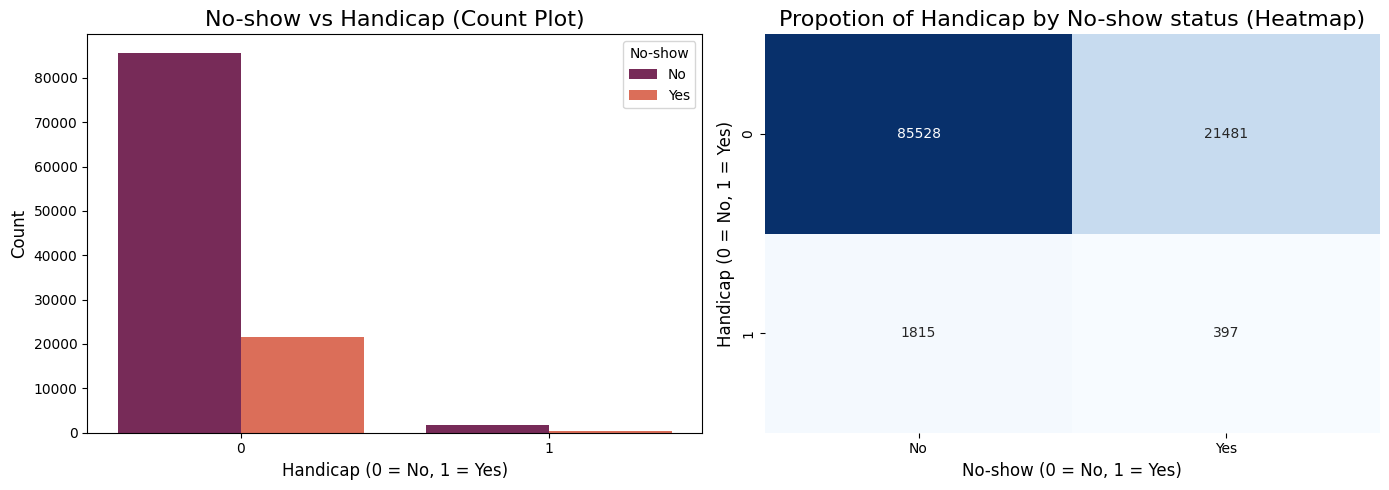

In [ ]:
# Set up the figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Create the count plot on the first axis
sns.countplot(data=data, x='Handicap', hue='No-show', palette='rocket', ax=axes[0])
axes[0].set_title('No-show vs Handicap (Count Plot)', fontsize=16)
axes[0].set_xlabel('Handicap (0 = No, 1 = Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Create the pivot table for the heatmap
pivot_table = pd.crosstab(data['Handicap'], data['No-show'])

# Create the heatmap on the second axis with cmap='Blues'
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Propotion of Handicap by No-show status (Heatmap)', fontsize=16)
axes[1].set_xlabel('No-show (0 = No, 1 = Yes)', fontsize=12)
axes[1].set_ylabel('Handicap (0 = No, 1 = Yes)', fontsize=12)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

**Figure 10:** The majority of individuals (with or without a handicap) appear to have shown up for their appointments, but the absolute count of individuals without a handicap is much higher.

### 3.1.10: DaysBetween

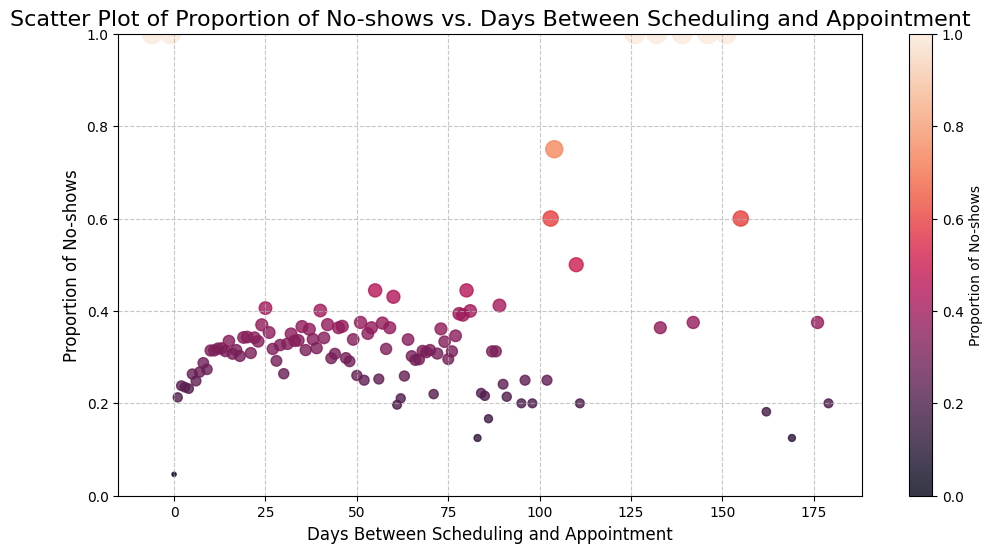

In [ ]:
# Calculate proportions of No-show for each DaysBetween value
proportion_data = (
    data.groupby(['DaysBetween', 'No-show'])
    .size()
    .unstack(fill_value=0)  # Pivot the data for easier calculation
)
proportion_data['Proportion_No-show'] = proportion_data['Yes'] / (proportion_data['Yes'] + proportion_data['No'])

# Reset index to make it easier to plot
proportion_data = proportion_data.reset_index()

plt.figure(figsize=(12, 6))

# Scatter plot of proportions
scatter = plt.scatter(
    x=proportion_data['DaysBetween'],
    y=proportion_data['Proportion_No-show'],
    c=proportion_data['Proportion_No-show'],  # Use proportion for color
    cmap='rocket',  # Apply the rocket palette
    s=proportion_data['Proportion_No-show'] * 200,  # Scale size by proportion
    alpha=0.8
)

# Add color bar
plt.colorbar(scatter, label='Proportion of No-shows')

# Customize plot aesthetics
plt.title('Scatter Plot of Proportion of No-shows vs. Days Between Scheduling and Appointment', fontsize=16)
plt.xlabel('Days Between Scheduling and Appointment', fontsize=12)
plt.ylabel('Proportion of No-shows', fontsize=12)
plt.ylim(0, 1)  # Proportions are between 0 and 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Figure 11: This scatter plot depicts the proportion of no-shows versus the number of days between scheduling and appointment. The x-axis represents the delay in days, while the y-axis shows the no-show proportion, ranging from 0 to 1. Each dot represents a specific data point, with color intensity indicating the no-show proportion based on the color bar on the right. The plot reveals that shorter delays (under 50 days) generally have no-show rates between 20% and 40%, while longer delays (over 100 days) show higher no-show rates, with some extreme cases approaching 100%. This suggests that longer wait times between scheduling and appointment significantly increase the likelihood of no-shows.

### **IMPORTANT TRENDS TO NOTICE:**


*   High No-show Rates: Many appointments are missed, signaling potential systemic issues like scheduling challenges or lack of engagement.
*   SMS Reminders: Surprisingly, receiving SMS reminders correlates with a higher no-show rate, which might indicate messaging inefficiency.
*   Age and No-shows: Younger patients, especially children, dominate the dataset, but age does not significantly influence no-show rates.
*   Gender: Females have more appointments and contribute more to no-shows, likely due to their higher appointment volume.
*   Health Conditions: No-shows are consistent across hypertension, diabetes, and alcoholism groups, with no strong correlations.
*   Economic Factors: Government aid recipients exhibit slightly different no-show patterns, potentially hinting at socioeconomic influences.

## 3.2 Correlation Matrix:

We will now observe whether any of our variables are highly correlated. We will do so by creating a heatmap of our variables. We would want to remove any highly correlated variables if they exist. By definition, highly correlated features are those that have correlations of 0.7 and above. We will now create a heatmap to observe the correlations in our variables to understand the relationships between features and the target variable. We will not be including PatientID or AppointmentID in this heatmap, since these variables should not be included in our heatmap.

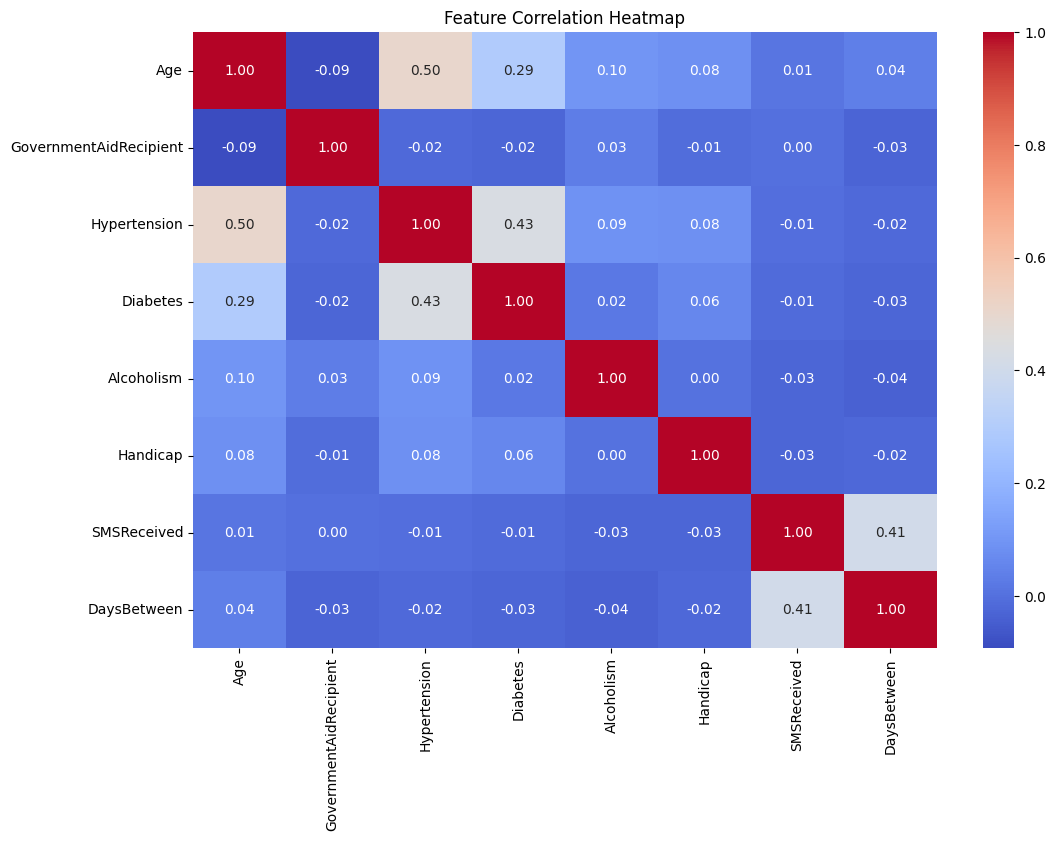

In [ ]:
heatmap_data = data.select_dtypes(include=['number'])
heatmap_data = heatmap_data.drop(['PatientID', 'AppointmentID'], axis=1)
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

As we can see, Age and hypertension are the highest correlated variables with a correlation of 0.50, followed by hypertension and diabetes, with a correlation of 0.43. Among hthe other variables, there are not very many correlations present. Since high correlation is defined as being between 0.7 and 1.0, there are no highly correlated variables present in our data. Therefore, we are not dropping the above columns.

Now that we have completed our Exploratory Data Analysis, we will move onto actually creating machine learning models to try to predict a medical appointment no-show. Before doing so, we will prepare our dataframe for analysis, keeping the columns that actually make sense. This will all be done in the Feature Engineering and Preprocessing portion below.

## 3.3 Feature Engineering Part 2: Creating Zipcodes Variable from Neighborhoods

We will now observe the neighborhoods feature in our dataset. We aim to gather zipcodes and coordinates for each neighborhood, and create an interactive map which shows the relationship between neighborhoods and other features

1.   We gather the Zipcodes for each neighborhood using a free publicly available api
2.   We fill in missing Zipcodes manually using a database
3.   We use these zipcodes to gather Latitude and Longitude coordinates
4.   Create interactive map plotting the neighborhoods




In [ ]:
counts = data['Neighborhood'].value_counts()

# Print all Neighborhoods and # of patients records
print(counts.to_string())

Neighborhood
JARDIM CAMBURI                 7510
MARIA ORTIZ                    5804
RESISTÊNCIA                    4314
JARDIM DA PENHA                3872
ITARARÉ                        3409
CENTRO                         3282
TABUAZEIRO                     3106
SANTA MARTHA                   3063
JESUS DE NAZARETH              2852
BONFIM                         2754
SANTO ANTÔNIO                  2727
SANTO ANDRÉ                    2548
CARATOÍRA                      2530
JABOUR                         2507
SÃO PEDRO                      2417
ILHA DO PRÍNCIPE               2265
NOVA PALESTINA                 2263
DA PENHA                       2182
ROMÃO                          2165
ANDORINHAS                     2140
GURIGICA                       2005
SÃO JOSÉ                       1953
BELA VISTA                     1888
ILHA DE SANTA MARIA            1885
MARUÍPE                        1877
FORTE SÃO JOÃO                 1843
SÃO CRISTÓVÃO                  1825
REDENÇÃO       

Next, we used the viacep Brazil api which is a Free high-performance webservice for consulting Brazilian Postal Codes to gather the zipcodes for each neighborhood






In [ ]:
import pandas as pd
import requests

# List of unique neighborhoods
unique_neighborhoods = data['Neighborhood'].unique()


results = {neighborhood: None for neighborhood in unique_neighborhoods}

# Loop through each neighborhood and stop when one zipcode is found
for neighborhood in unique_neighborhoods:
#for city, state in cities_states:
    # URL for ViaCEP API
    url = f"https://viacep.com.br/ws/ES/Vitória/{neighborhood}/json/"
    try:
        # Send a GET request to the API
        print(f'{neighborhood}')
        response = requests.get(url)
        response.raise_for_status()
        data_return = response.json()
        city = "Vitória"
        state = "ES"
        # Check if valid data is returned
        if isinstance(data_return, list) and len(data_return) > 0:
            # Extract the first result's postal code
            zipcode = data_return[0].get('cep', 'N/A')
            print(f'Found zipcode for {neighborhood}: {zipcode}')
            # Store the result (zipcode, city, state) and move to the next neighborhood
            results[neighborhood] = (zipcode, city, state)
            #break  # Stop searching for this neighborhood once a zipcode is found

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {neighborhood} in {city}, {state}: {e}")

# Create a new DataFrame from the results
zipcode_df = pd.DataFrame(
    [
        {
            "Neighborhood": neighborhood,
            "Zipcode": data[0] if data else "NA",
            "City": data[1] if data else "NA",
        }
        for neighborhood, data in results.items()
    ]
)



# Display the new DataFrame
zipcode_df

JARDIM DA PENHA
MATA DA PRAIA
PONTAL DE CAMBURI
REPÚBLICA
Found zipcode for REPÚBLICA: 29010-700
GOIABEIRAS
Found zipcode for GOIABEIRAS: 29024-520
ANDORINHAS
Found zipcode for ANDORINHAS: 29046-029
CONQUISTA
Found zipcode for CONQUISTA: 29032-793
NOVA PALESTINA
Found zipcode for NOVA PALESTINA: 29032-361
DA PENHA
Found zipcode for DA PENHA: 29075-515
TABUAZEIRO
Found zipcode for TABUAZEIRO: 29043-524
BENTO FERREIRA
SÃO PEDRO
Found zipcode for SÃO PEDRO: 29072-240
SANTA MARTHA
SÃO CRISTÓVÃO
MARUÍPE
Found zipcode for MARUÍPE: 29045-230
GRANDE VITÓRIA
SÃO BENEDITO
Found zipcode for SÃO BENEDITO: 29027-470
ILHA DAS CAIEIRAS
SANTO ANDRÉ
Found zipcode for SANTO ANDRÉ: 29025-340
SOLON BORGES
Found zipcode for SOLON BORGES: 29072-190
BONFIM
Found zipcode for BONFIM: 29027-065
JARDIM CAMBURI
MARIA ORTIZ
Found zipcode for MARIA ORTIZ: 29015-130
JABOUR
ANTÔNIO HONÓRIO
Found zipcode for ANTÔNIO HONÓRIO: 29050-770
RESISTÊNCIA
Found zipcode for RESISTÊNCIA: 29032-555
ILHA DE SANTA MARIA
JUCUTUQUARA

,Neighborhood,Zipcode,City
0,JARDIM DA PENHA,NA,NA
1,MATA DA PRAIA,NA,NA
2,PONTAL DE CAMBURI,NA,NA
3,REPÚBLICA,29010-700,Vitória
4,GOIABEIRAS,29024-520,Vitória
...,...,...,...
76,FRADINHOS,NA,NA
77,NAZARETH,29052-095,Vitória
78,AEROPORTO,NA,NA
79,ILHAS OCEÂNICAS DE TRINDADE,NA,NA


In [ ]:
zipcode_df[zipcode_df['Zipcode'] == 'NA'].value_counts().count()
#47 not found


47

47 Neighborhoods were unable to be mapped to a Zipcode. Below we show these neighborhoods and their patient id counts

In [ ]:
#How many rows map to these?
na_neighborhoods = zipcode_df[zipcode_df['Zipcode'] == 'NA']['Neighborhood']
na_counts = data[data['Neighborhood'].isin(na_neighborhoods)].groupby('Neighborhood').size()
na_counts.sort_values(ascending=False)

,0
Neighborhood,
JARDIM CAMBURI,7510
JARDIM DA PENHA,3872
ITARARÉ,3409
CENTRO,3282
SANTA MARTHA,3063
JESUS DE NAZARETH,2852
CARATOÍRA,2530
JABOUR,2507
ILHA DO PRÍNCIPE,2265


In an effort to curate as many Zipcodes as we can, we manually checked the remaining Zipcodes using:
https://www.nigeriapostcodes.ng/region4/brazil/br/vitoria/1037102618/

In [ ]:
#Add manual data to DF
neighborhood_data = [
    {"Neighborhood": "JARDIM CAMBURI", "Zipcode": "29090-070", "City": "Vitória"},
    {"Neighborhood": "JARDIM DA PENHA", "Zipcode": "29050-000", "City": "Vitória"},
    {"Neighborhood": "ITARARÉ", "Zipcode": "29047-647", "City": "Vitória"},
    {"Neighborhood": "CENTRO", "Zipcode": "29015-005", "City": "Vitória"},
    {"Neighborhood": "SANTA MARTHA", "Zipcode": "29046-503", "City": "Vitória"},
    {"Neighborhood": "JESUS DE NAZARETH", "Zipcode": "29052-040", "City": "Vitória"},
    {"Neighborhood": "CARATOÍRA", "Zipcode": "29025-645", "City": "Vitória"},
    {"Neighborhood": "JABOUR", "Zipcode": "29072-255", "City": "Vitória"},
    {"Neighborhood": "ILHA DO PRÍNCIPE", "Zipcode": "29020-380", "City": "Vitória"},
    {"Neighborhood": "GURIGICA", "Zipcode": "29046-053", "City": "Vitória"},
    {"Neighborhood": "ILHA DE SANTA MARIA", "Zipcode": "29051-050", "City": "Vitória"},
    {"Neighborhood": "FORTE SÃO JOÃO", "Zipcode": "29017-174", "City": "Vitória"},
    {"Neighborhood": "SÃO CRISTÓVÃO", "Zipcode": "29048-550", "City": "Vitória"},
    {"Neighborhood": "REDENÇÃO", "Zipcode": "29032-785", "City": "Vitória"},
    {"Neighborhood": "JOANA D´ARC", "Zipcode": "29048-070", "City": "Vitória"},
    {"Neighborhood": "PRAIA DO SUÁ", "Zipcode": "29052-330", "City": "Vitória"},
    {"Neighborhood": "GRANDE VITÓRIA", "Zipcode": "29031-307", "City": "Vitória"},
    {"Neighborhood": "INHANGUETÁ", "Zipcode": "29031-610", "City": "Vitória"},
    {"Neighborhood": "ILHA DAS CAIEIRAS", "Zipcode": "29032-131", "City": "Vitória"},
    {"Neighborhood": "PRAIA DO CANTO", "Zipcode": "29055-285", "City": "Vitória"},
    {"Neighborhood": "BENTO FERREIRA", "Zipcode": "29050-620", "City": "Vitória"},
    {"Neighborhood": "VILA RUBIM", "Zipcode": "29025-023", "City": "Vitória"},
    {"Neighborhood": "DO QUADRO", "Zipcode": "29027-110", "City": "Vitória"},
    {"Neighborhood": "MONTE BELO", "Zipcode": "29053-325", "City": "Vitória"},
    {"Neighborhood": "JUCUTUQUARA", "Zipcode": "29040-750", "City": "Vitória"},
    {"Neighborhood": "FONTE GRANDE", "Zipcode": "29016-714", "City": "Vitória"},
    {"Neighborhood": "MATA DA PRAIA", "Zipcode": "29066-160", "City": "Vitória"},
    {"Neighborhood": "ESTRELINHA", "Zipcode": "29031-012", "City": "Vitória"},
    {"Neighborhood": "SANTA LÚCIA", "Zipcode": "29056-055", "City": "Vitória"},
    {"Neighborhood": "SANTA LUÍZA", "Zipcode": "29045-410", "City": "Vitória"},
    {"Neighborhood": "BARRO VERMELHO", "Zipcode": "29057-570", "City": "Vitória"},
    {"Neighborhood": "DO MOSCOSO", "Zipcode": "29020-749", "City": "Vitória"},
    {"Neighborhood": "COMDUSA", "Zipcode": "29032-055", "City": "Vitória"},
    {"Neighborhood": "ARIOVALDO FAVALESSA", "Zipcode": "29027-017", "City": "Vitória"},
    {"Neighborhood": "FRADINHOS", "Zipcode": "29042-327", "City": "Vitória"},
    {"Neighborhood": "ENSEADA DO SUÁ", "Zipcode": "29050-230", "City": "Vitória"},
    {"Neighborhood": "SANTA HELENA", "Zipcode": "29055-090", "City": "Vitória"},
    {"Neighborhood": "HORTO", "Zipcode": "29045-157", "City": "Vitória"},
    {"Neighborhood": "UNIVERSITÁRIO", "Zipcode": "29031-540", "City": "Vitória"},
    {"Neighborhood": "SEGURANÇA DO LAR", "Zipcode": "29072-355", "City": "Vitória"},
    {"Neighborhood": "MORADA DE CAMBURI", "Zipcode": "29062-555", "City": "Vitória"},
    {"Neighborhood": "PONTAL DE CAMBURI", "Zipcode": "29062-030", "City": "Vitória"},
    {"Neighborhood": "ILHA DO BOI", "Zipcode": "29052-620", "City": "Vitória"},
    {"Neighborhood": "ILHA DO FRADE", "Zipcode": "29057-015", "City": "Vitória"},
    {"Neighborhood": "AEROPORTO", "Zipcode": "29075-600", "City": "Vitória"},
    {"Neighborhood": "ILHAS OCEÂNICAS DE TRINDADE", "Zipcode": "29052-800", "City": "Vitória"},
    {"Neighborhood": "PARQUE INDUSTRIAL", "Zipcode": "29092-300", "City": "Vitória"}
]
manual_update_zipcodes = pd.DataFrame(neighborhood_data)

In [ ]:
#Update zipcode_df:
manual_data_dict = manual_update_zipcodes.set_index('Neighborhood').to_dict('index')

# Update zipcodes_df
for index, row in zipcode_df.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in manual_data_dict:
        zipcode_df.at[index, 'Zipcode'] = manual_data_dict[neighborhood]['Zipcode']
        zipcode_df.at[index, 'City'] = manual_data_dict[neighborhood]['City']

We now strip away the trailing "street" aspect of the Zipcodes, returning a larger area which will include multiple neighborhoods

In [ ]:
#Use Regex to strip away street id for Zipcodes:
zipcode_df['Zipcode'] = zipcode_df['Zipcode'].str.replace(r'-.*', '', regex=True)

zipcode_df

,Neighborhood,Zipcode,City
0,JARDIM DA PENHA,29050,Vitória
1,MATA DA PRAIA,29066,Vitória
2,PONTAL DE CAMBURI,29062,Vitória
3,REPÚBLICA,29010,Vitória
4,GOIABEIRAS,29024,Vitória
...,...,...,...
76,FRADINHOS,29042,Vitória
77,NAZARETH,29052,Vitória
78,AEROPORTO,29075,Vitória
79,ILHAS OCEÂNICAS DE TRINDADE,29052,Vitória


Next, we gather the Latitude and Longitude coordinates based on the Zipcodes using a freely available API and key

In [ ]:
#Use Free API to get Latitude and Longitude coordinates for Zipcodes
import pandas as pd
import requests
import time

# Load your DataFrame (replace with your actual DataFrame loading code)
# Example:
# OpenCage Geocoder API key (replace with your API key)
OPENCAGE_API_KEY = '2f5c2ee6483d44aba56a9244dc680063'
OPENCAGE_URL = 'https://api.opencagedata.com/geocode/v1/json'

# Function to get latitude and longitude using OpenCage Geocoder
def get_lat_lng(zipcode):
    params = {
        'q': f"{zipcode}, Vitória, ES, Brazil",
        'key': OPENCAGE_API_KEY
    }
    response = requests.get(OPENCAGE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['results']:
            location = data['results'][0]['geometry']
            return location['lat'], location['lng']
    return None, None

# Add latitude and longitude columns to the DataFrame
manual_update_zipcodes['Latitude'] = None
manual_update_zipcodes['Longitude'] = None

# Loop through each zipcode and fetch latitude/longitude
for idx, row in zipcode_df.iterrows():
    zipcode = row['Zipcode']
    Neighborhood = row['Neighborhood']
    lat, lng = get_lat_lng(zipcode)
    #print(f'Neighborhood {Neighborhood} latitude: {lat} longitude: {lng}')
    zipcode_df.at[idx, 'Latitude'] = lat
    zipcode_df.at[idx, 'Longitude'] = lng
    print(f"Processed {Neighborhood} {zipcode}: Latitude={lat}, Longitude={lng}")
    time.sleep(1)  # Avoid hitting API rate limits

# Save the updated DataFrame to a CSV file if needed
#zipcode_df.to_csv('zipcodes_with_latlng.csv', index=False)

print("Latitude and longitude data added successfully.")


Processed JARDIM DA PENHA 29050: Latitude=-20.3200917, Longitude=-40.3376682
Processed MATA DA PRAIA 29066: Latitude=-20.2768799, Longitude=-40.30032
Processed PONTAL DE CAMBURI 29062: Latitude=-20.3200917, Longitude=-40.3376682
Processed REPÚBLICA 29010: Latitude=-20.3200917, Longitude=-40.3376682
Processed GOIABEIRAS 29024: Latitude=-20.3200917, Longitude=-40.3376682
Processed ANDORINHAS 29046: Latitude=-20.31005, Longitude=-40.31101
Processed CONQUISTA 29032: Latitude=-20.27736, Longitude=-40.32852
Processed NOVA PALESTINA 29032: Latitude=-20.27736, Longitude=-40.32852
Processed DA PENHA 29075: Latitude=-20.2708799, Longitude=-40.29958
Processed TABUAZEIRO 29043: Latitude=-20.3200917, Longitude=-40.3376682
Processed BENTO FERREIRA 29050: Latitude=-20.3200917, Longitude=-40.3376682
Processed SÃO PEDRO 29072: Latitude=-20.8381234, Longitude=-40.7224411
Processed SANTA MARTHA 29046: Latitude=-20.31005, Longitude=-40.31101
Processed SÃO CRISTÓVÃO 29048: Latitude=-20.28538, Longitude=-40

In [ ]:
#Show the zipcode_df
zipcode_df

,Neighborhood,Zipcode,City,Latitude,Longitude
0,JARDIM DA PENHA,29050,Vitória,-20.320092,-40.337668
1,MATA DA PRAIA,29066,Vitória,-20.276880,-40.300320
2,PONTAL DE CAMBURI,29062,Vitória,-20.320092,-40.337668
3,REPÚBLICA,29010,Vitória,-20.320092,-40.337668
4,GOIABEIRAS,29024,Vitória,-20.320092,-40.337668
...,...,...,...,...,...
76,FRADINHOS,29042,Vitória,-20.299360,-40.317020
77,NAZARETH,29052,Vitória,-20.320092,-40.337668
78,AEROPORTO,29075,Vitória,-20.270880,-40.299580
79,ILHAS OCEÂNICAS DE TRINDADE,29052,Vitória,-20.320092,-40.337668


In [ ]:
#How many unique zipcodes? How many rows correspond to the zipcodes?
unique_zipcodes = zipcode_df['Zipcode'].unique()
unique_zipcode_count = len(unique_zipcodes)
unique_zipcode_count

34

We have 81 unique neighborhoods, and 34 unique zipcodes meaning that we have multiple neighborhoods in the dataset represented by the same zipcode.

In [ ]:
#Show Zipcodes with the most neighborhoods
zipcode_df.groupby('Zipcode').size().sort_values(ascending=False)

,0
Zipcode,
29032,7
29027,6
29031,5
29052,5
29045,4
29072,4
29050,4
29043,3
29046,3


In [ ]:
#How many Coordinates overlap?
zipcode_df.groupby(['Latitude', 'Longitude']).size().sort_values(ascending=False)

,,0
Latitude,Longitude,
-20.320092,-40.337668,43
-20.277360,-40.328520,7
-20.316690,-40.357940,6
-20.838123,-40.722441,5
-20.287490,-40.337710,5
-20.315460,-40.352560,3
-20.310050,-40.311010,3
-20.297360,-40.310020,2
-20.285380,-40.310070,2


43 of our neighborhoods have the same coordinates

In [ ]:
#Merge Zipcodes df which contains Zipcode, City, Latitude, Longitude to the main dataframe
updated_data = data.merge(zipcode_df, on='Neighborhood', how='left')

In [ ]:
no_show_proportion = (
    updated_data.groupby('Zipcode')['No-show']
    .apply(lambda x: (x == 'Yes').mean())
    .reset_index(name='No-show Proportion')
)

# Sort by Zipcode for a cleaner plot
no_show_proportion = no_show_proportion.sort_values('Zipcode')
no_show_proportion


,Zipcode,No-show Proportion
0,29010,0.201795
1,29015,0.210103
2,29016,0.217718
3,29017,0.177971
4,29018,0.249133
5,29020,0.233159
6,29023,0.199682
7,29024,0.192460
8,29025,0.206309
9,29027,0.187189


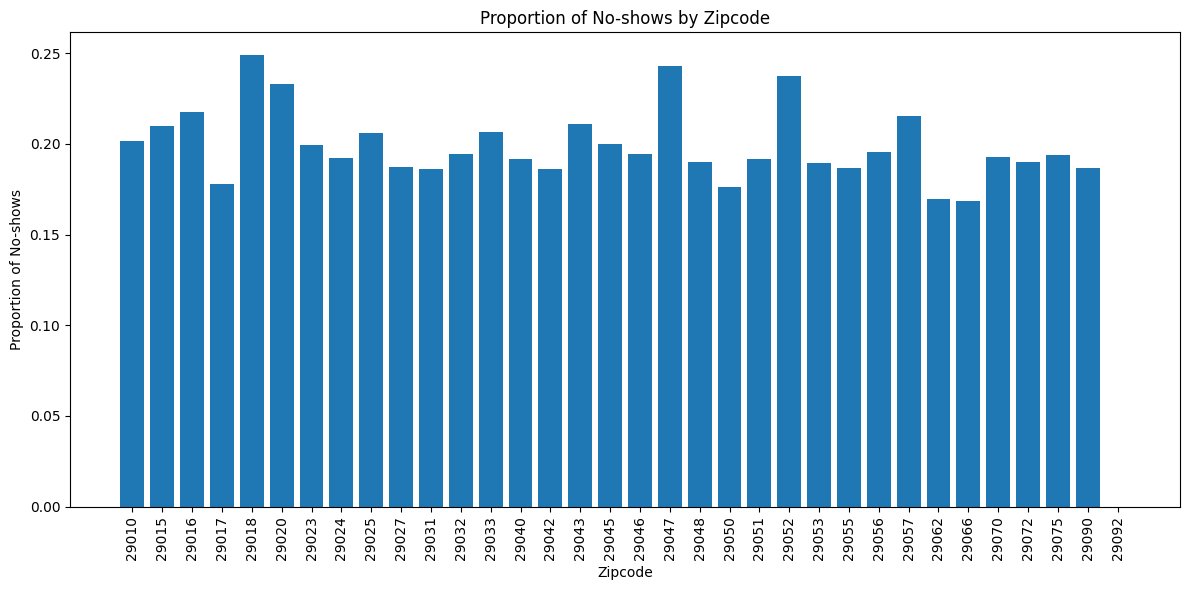

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(no_show_proportion['Zipcode'].astype(str), no_show_proportion['No-show Proportion'])
plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Proportion of No-shows')
plt.title('Proportion of No-shows by Zipcode')
plt.tight_layout()
plt.show()

This image depicts a bar chart showing the proportion of no-shows by zip code. The x-axis lists various zip codes, while the y-axis represents the no-show rate, ranging between 0.15 and 0.25. Each bar indicates the proportion of no-shows for a specific zip code, highlighting differences in missed appointments across locations. Some zip codes, such as 29020 and 29047, have the highest no-show rates near 0.25, while others, like 29017 and 29066, show lower rates around 0.17. This visualization helps identify areas where no-show rates are higher, which can guide targeted intervention strategies.

**Create an interactive Map of the Zipcodes**



In [ ]:
import folium
from folium import Popup
from folium.plugins import MarkerCluster
import pandas as pd

# Step 1: Calculate no-show proportion for each Zipcode
Grouped_no_show_proportion = (
    updated_data.groupby('Zipcode')['No-show']
    .apply(lambda x: (x == 'Yes').mean())
    .reset_index(name='Grouped_No_show_Proportion')
)

# Step 2: Group by 'Zipcode' and calculate required metrics, including 'DaysBetween'
grouped_data = updated_data.groupby('Zipcode').agg(
    Grouped_Average_Age=('Age', 'mean'),
    Grouped_Proportion_SMSReceived=('SMSReceived', 'mean'),
    Grouped_Proportion_GovernmentAid=('GovernmentAidRecipient', 'mean'),
    Patient_Count=('PatientID', 'count'),  # Add patient count
    Grouped_Average_DaysBetween=('DaysBetween', 'mean')  # Add average days between
).reset_index()

# Step 3: Merge grouped data with no-show proportion
grouped_data = grouped_data.merge(Grouped_no_show_proportion, on='Zipcode', how='left')

# Step 5: Check and handle column conflicts before merging
# Identify overlapping columns (except the merge key 'Zipcode')
overlapping_columns = set(zipcode_df.columns) & set(grouped_data.columns) - {'Zipcode'}

# Drop overlapping columns from zipcode_df if they exist
zipcode_df = zipcode_df.drop(columns=overlapping_columns, errors='ignore')

# Merge grouped_data with zipcode_df
zipcode_df = zipcode_df.merge(grouped_data, on='Zipcode', how='left', suffixes=('', '_new'))

# Debugging: Check columns in zipcode_df
print("Zipcode DataFrame Columns:", zipcode_df.columns)

# Step 6: Create the map and add markers
# Center the map on Vitória, Brazil
center_coordinates = [-20.3055, -40.3128]  # Vitória's latitude and longitude
map = folium.Map(location=center_coordinates, zoom_start=14)

# Create a MarkerCluster for better visualization of multiple points
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each row in the dataframe
for idx, row in zipcode_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    neighborhood = row['Neighborhood']
    zipcode = row['Zipcode']
    average_age = row['Grouped_Average_Age']
    proportion_sms_received = row['Grouped_Proportion_SMSReceived'] * 100  # Convert to percentage
    proportion_government_aid = row['Grouped_Proportion_GovernmentAid'] * 100  # Convert to percentage
    no_show_proportion = row['Grouped_No_show_Proportion'] * 100  # Convert to percentage
    average_days_between = row['Grouped_Average_DaysBetween']  # Average days between
    patient_count = row['Patient_Count']  # Patient count

    # Determine color based on No-show Proportion
    if no_show_proportion > 20:  # High no-show proportion
        color = 'red'
    elif no_show_proportion <= 20:  # Low no-show proportion
        color = 'green'
    else:  # Intermediate no-show proportion
        color = 'yellow'

    # Add metrics to the popup content
    popup_content = (
        f"Neighborhood: {neighborhood}<br>"
        f"Zipcode: {zipcode}<br>"
        f"No-show Proportion: {no_show_proportion:.2f}%<br>"
        f"Number of Patients: {patient_count}<br>"  # Add patient count
        f"Average Age: {average_age:.2f}<br>"
        f"SMS Received: {proportion_sms_received:.2f}%<br>"
        f"Government Aid Recipient: {proportion_government_aid:.2f}%<br>"
        f"Average Days Between Appointments: {average_days_between:.2f}<br>"  # Add DaysBetween
    )
    popup = Popup(popup_content, max_width=300)

    # Add marker with color-coded icon
    folium.Marker(
        location=[latitude, longitude],
        popup=popup,
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Render the map
map

Zipcode DataFrame Columns: Index(['Neighborhood', 'Zipcode', 'City', 'Latitude', 'Longitude',
       'Grouped_Average_Age', 'Grouped_Proportion_SMSReceived',
       'Grouped_Proportion_GovernmentAid', 'Patient_Count',
       'Grouped_Average_DaysBetween', 'Grouped_No_show_Proportion'],
      dtype='object')


## UML Diagram:

To model the relationships in our data, we have created a UML Diagram. This depicts 3 entitites.



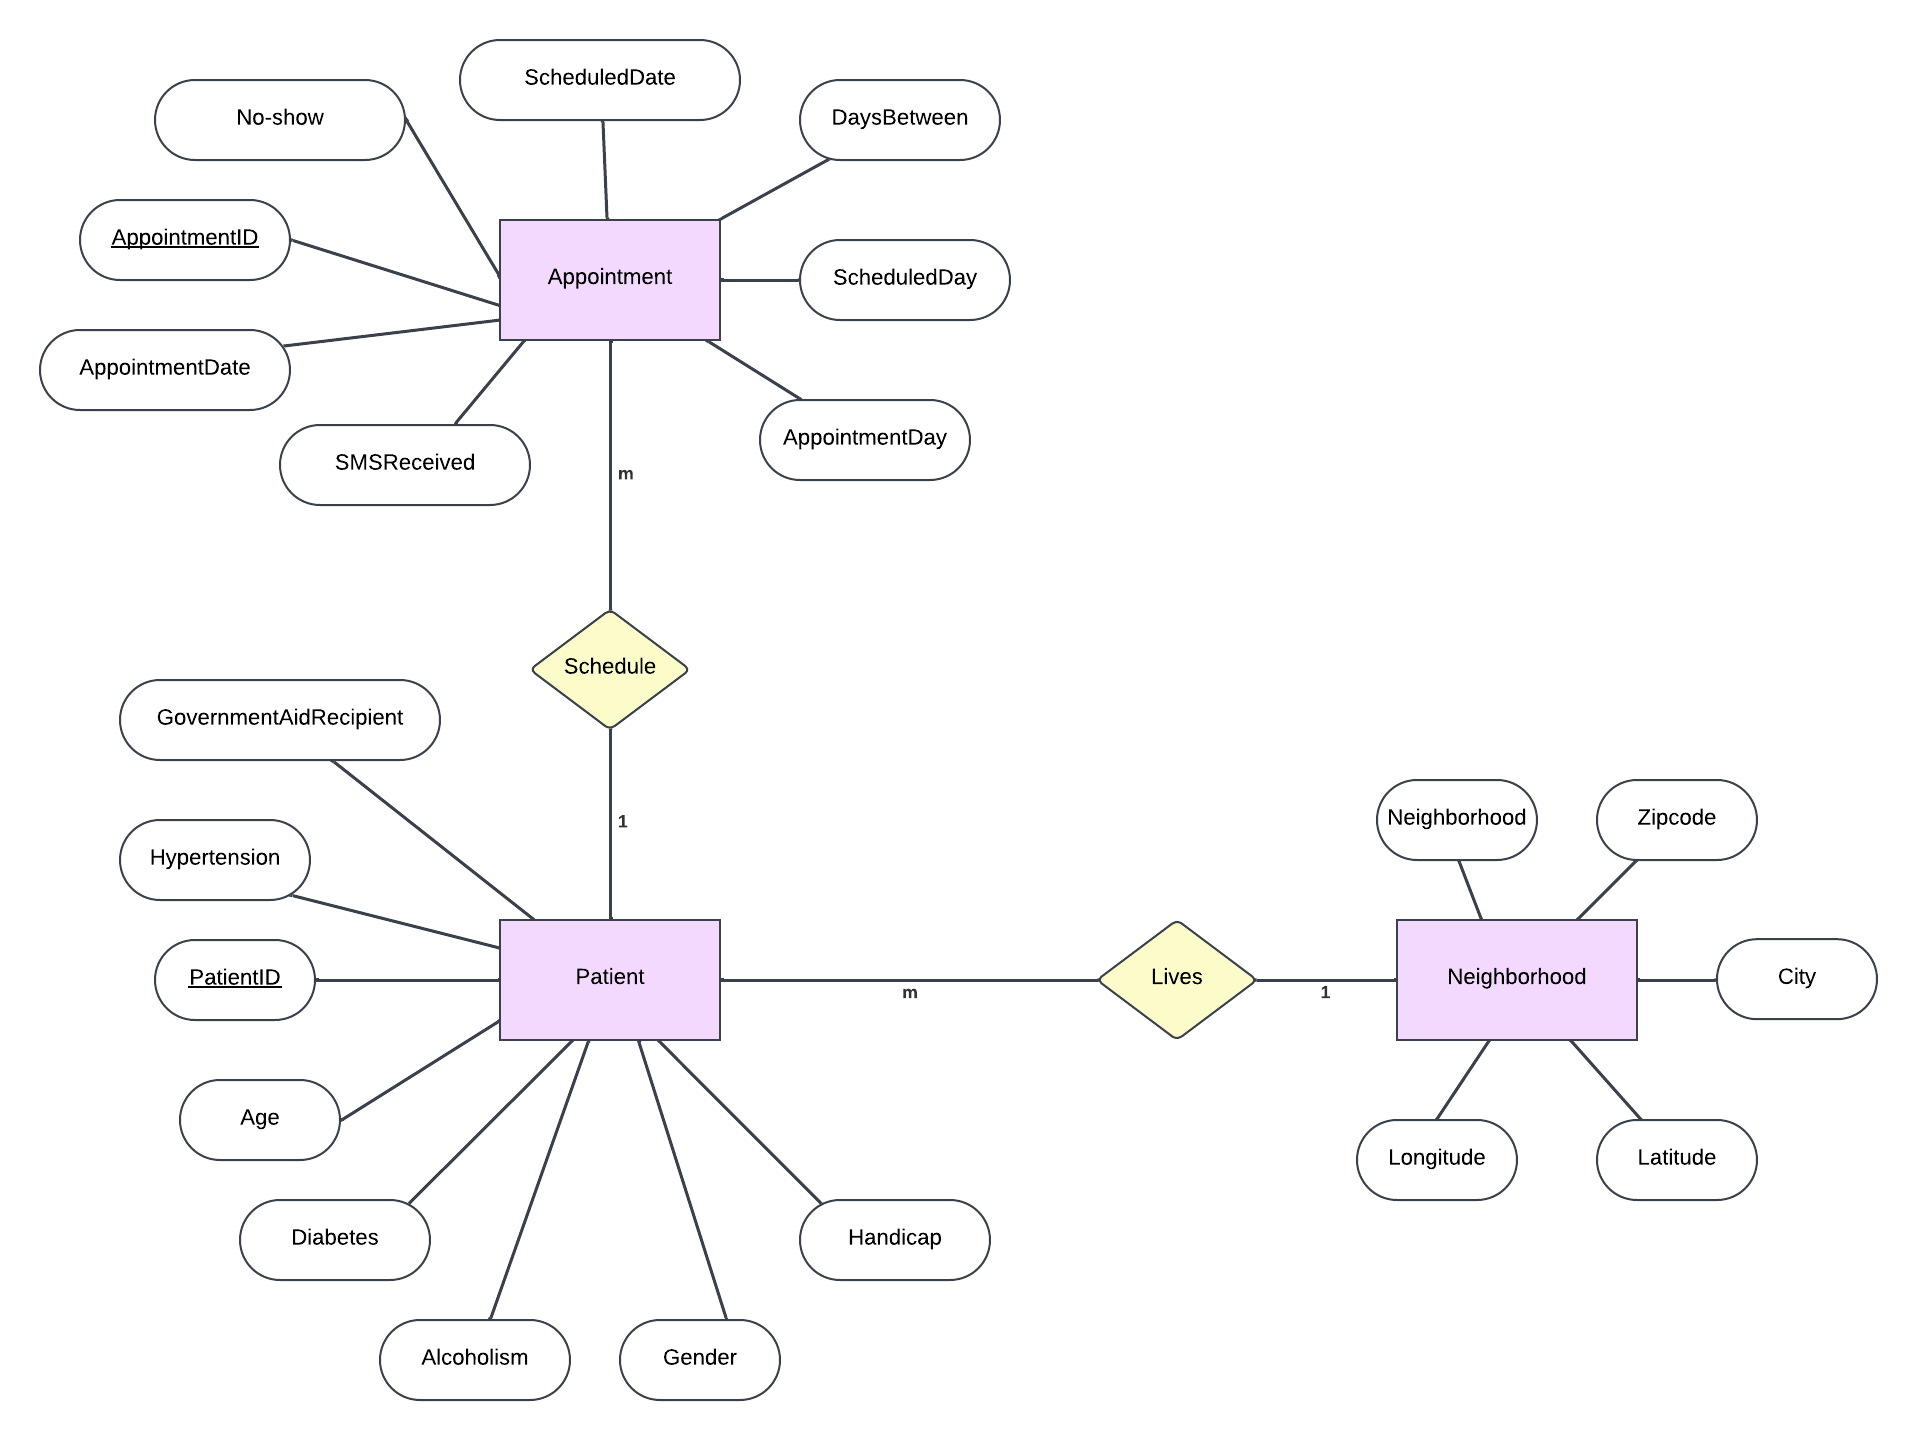

# Part 4: Preprocessing Data for Modeling Purposes


For the purpose of creating our models, we will create a copy of our current `data` dataframe, and call it `df`. We will modify `df` such that it includes the variables that are helpful for modeling, now that our EDA process has been completed.

In [ ]:
# Create copy of data: save into df
df = updated_data.copy()

In [ ]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighborhood,GovernmentAidRecipient,Hypertension,Diabetes,...,No-show,ScheduledTime,AppointmentTime,ScheduledDay,AppointmentDay,DaysBetween,Zipcode,City,Latitude,Longitude
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,No,18:38:08,00:00:00,Friday,Friday,0,29050,Vitória,-20.320092,-40.337668
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,No,16:08:27,00:00:00,Friday,Friday,0,29050,Vitória,-20.320092,-40.337668
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,No,16:19:04,00:00:00,Friday,Friday,0,29066,Vitória,-20.276880,-40.300320
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,No,17:29:31,00:00:00,Friday,Friday,0,29062,Vitória,-20.320092,-40.337668
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,No,16:07:23,00:00:00,Friday,Friday,0,29050,Vitória,-20.320092,-40.337668


In [ ]:
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDate',
       'AppointmentDate', 'Age', 'Neighborhood', 'GovernmentAidRecipient',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'No-show', 'ScheduledTime', 'AppointmentTime', 'ScheduledDay',
       'AppointmentDay', 'DaysBetween', 'Zipcode', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

We will be dropping the columns that we do not want to include in our model: PatientID, AppointmentID, ScheuledDate, AppointmentDate, ScheduledTime, AppointmentTime, City, Latitude, Longitude, and Neighborhood.

In [ ]:
# Dropping unwanted columns
df.drop(columns=['PatientID', 'AppointmentID', 'ScheduledDate', 'AppointmentDate', 'ScheduledTime', 'AppointmentTime', 'City', 'Latitude', 'Longitude', 'Neighborhood'], inplace=True)

In [ ]:
df

,Gender,Age,GovernmentAidRecipient,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,ScheduledDay,AppointmentDay,DaysBetween,Zipcode
0,F,62,0,1,0,0,0,0,No,Friday,Friday,0,29050
1,M,56,0,0,0,0,0,0,No,Friday,Friday,0,29050
2,F,62,0,0,0,0,0,0,No,Friday,Friday,0,29066
3,F,8,0,0,0,0,0,0,No,Friday,Friday,0,29062
4,F,56,0,1,1,0,0,0,No,Friday,Friday,0,29050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109216,F,56,0,0,0,0,0,1,No,Tuesday,Tuesday,35,29015
109217,F,51,0,0,0,0,0,1,No,Tuesday,Tuesday,35,29015
109218,F,21,0,0,0,0,0,1,No,Wednesday,Wednesday,41,29015
109219,F,38,0,0,0,0,0,1,No,Wednesday,Wednesday,41,29015


## 4.2: One-hot Encode Variables

We will be one-hot encoding the following variables:
1. Gender
2. ScheduledDay
3. AppointmentDay

We want to observe whether gender has an impact on whether an individual does not show up to their appointment. Similarly, we suspect that ScheduledDay or AppointmentDay impact whether someone does not show up to their appointments.

In [ ]:
# One hot encoding:
columns_to_encode = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Zipcode']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [ ]:
df.columns

Index(['Age', 'GovernmentAidRecipient', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMSReceived', 'No-show', 'DaysBetween',
       'Gender_M', 'ScheduledDay_Monday', 'ScheduledDay_Saturday',
       'ScheduledDay_Thursday', 'ScheduledDay_Tuesday',
       'ScheduledDay_Wednesday', 'AppointmentDay_Monday',
       'AppointmentDay_Saturday', 'AppointmentDay_Thursday',
       'AppointmentDay_Tuesday', 'AppointmentDay_Wednesday', 'Zipcode_29015',
       'Zipcode_29016', 'Zipcode_29017', 'Zipcode_29018', 'Zipcode_29020',
       'Zipcode_29023', 'Zipcode_29024', 'Zipcode_29025', 'Zipcode_29027',
       'Zipcode_29031', 'Zipcode_29032', 'Zipcode_29033', 'Zipcode_29040',
       'Zipcode_29042', 'Zipcode_29043', 'Zipcode_29045', 'Zipcode_29046',
       'Zipcode_29047', 'Zipcode_29048', 'Zipcode_29050', 'Zipcode_29051',
       'Zipcode_29052', 'Zipcode_29053', 'Zipcode_29055', 'Zipcode_29056',
       'Zipcode_29057', 'Zipcode_29062', 'Zipcode_29066', 'Zipcode_29070',
       'Zipco

The gender column has been converted into Gender_M, and the AppointmentDay of Friday has been dropped.

## 4.3 Appropriately Converting Variables into Binary Variables

We will now convert our no-show column into a binary variable, such that 1 indicates a "Yes" and 0 indicates a "No". This will be our outcome variable that we are trying to predict. We will also ensure that we replace all Trues in our dataframe into 1s, and all Falses into 0s.

In [ ]:
# No-show column:
df['No-show'] = df['No-show'].str.strip().str.capitalize()

# Convert 'No-show' to numeric values (Yes → 1, No → 0)
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

# Check for any remaining NaN values
print(df['No-show'].isna().sum())

# replace all Trues into 1s, and all Falses into 0s
df = df.replace({True: 1, False: 0})

0


<ipython-input-72-a9c5c57e572d>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


## 4.3 Train-Test Split

We will now prepare our data for modeling by splitting our data into X (features) and y (outcome). We will also split our data into train, validation, and test splits. We will also standardize the numeric variables in our data.

In [ ]:
df

,Age,GovernmentAidRecipient,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,DaysBetween,Gender_M,...,Zipcode_29055,Zipcode_29056,Zipcode_29057,Zipcode_29062,Zipcode_29066,Zipcode_29070,Zipcode_29072,Zipcode_29075,Zipcode_29090,Zipcode_29092
0,62,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109216,56,0,0,0,0,0,1,0,35,0,...,0,0,0,0,0,0,0,0,0,0
109217,51,0,0,0,0,0,1,0,35,0,...,0,0,0,0,0,0,0,0,0,0
109218,21,0,0,0,0,0,1,0,41,0,...,0,0,0,0,0,0,0,0,0,0
109219,38,0,0,0,0,0,1,0,41,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating X and y from our df
X = df.drop(columns=['No-show'])
y = df['No-show']

**SUMMARY:**

In the feature engineering phase, we created two new features: zip codes for the neighborhood and days in between the scheduling day and the appointment day. These new features were added to provide more granular information and improve the model’s ability to make accurate predictions.

Additionally, we performed a test-train split to ensure proper training and evaluation of the model. We also applied one-hot encoding to the Gender, ScheduledDay, and AppointmentDay variables, as we wanted to observe their impact on the no-show rate. Specifically, we aimed to explore whether Gender influences the likelihood of no-shows, and whether ScheduledDay or AppointmentDay affect the chances of a patient missing their appointment. These preprocessing steps helped prepare the dataset for effective model development.

# Part 5: Modeling


# Modeling
For the classification task, the goal is to predict whether a patient will show up for their appointment using all the features provided.

We will be implementing the following 4 models and tuning them after implementing initial versions of the model. For our baseline model, we will be using a standard logistic regression model.

Our models are below:
1. Logistic Regression (Baseline Model):
A simple model to start with, which is effective for binary classification tasks.  It provides a straightforward approach to understanding the relationship between the features (e.g., Age, Hypertension, etc.) and the likelihood of a medical no-show, which is helpful for initial comparisons against more complex models.

2. Decision Tree Classifier:
Decision Trees are easy to interpret and provide clear decision rules for classification, which can be useful for understanding the driving factors behind a no-show. While they are prone to overfitting, they can capture complex relationships between features and are a good starting point for exploring the structure of the dataset.

3. Random Forest Classifier:
Random Forest is an ensemble learning method that improves predictive performance by combining multiple decision trees. It is particularly effective for handling imbalanced datasets because it builds multiple trees and reduces overfitting, thus improving accuracy and generalization. Random Forest is also less sensitive to outliers and missing values, making it robust for real-world data.

4. XGBoost Classifier:
 XGBoost is a gradient boosting algorithm that that works well for imbalanced datasets by focusing on minimizing error in the difficult-to-classify instances. It often performs well in classification tasks with structured data, and ultimately making it a strong candidate for predicting no-show events

In this stage, we split the dataset into training and testing sets using an 80-20 split, ensuring the distribution of the target variable (y) is preserved with stratification. We then identified the numerical columns, Age and DaysBetween, for scaling. Using StandardScaler, we standardized these numerical features to have a mean of 0 and a standard deviation of 1, improving the model's performance by ensuring all features are on a similar scale. The scaling was applied to both the training and testing sets, with the scaler fitted on the training data and then applied to the test data to avoid data leakage.

## 5.1 Train-Test Split, Stratifying y, and Scaling
Below, we will split our data into a training and test set while making sure to stratify on our outcome variable Stratifying on y during our train-test splitting helps us ensure that the class proportions in the training and test sets are the same as in the original dataset, maintaining a representative distribution for reliable model training and evaluation. We will implement a test size of 20% and a train size of 80%.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cols to scale
numeric_columns = ['Age', 'DaysBetween']

# Scale numerical features
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

## 5.1 Baseline Logistic Regression

Now that our data is ready for processing, we will be creating a baseline logistic regression model. Since in our EDA step, we observed a difference in our target variable, we have made sure to split our data such that we are stratifying on our target variable (y). When training the logistic regression model, we will balance our class weights as well.

Below, we are training a standard logistic regression model, evaluating its performance based on accuracy, F1-score, and the classification report.

In [ ]:
# Train the logistic regression model using only numerical features
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate Standard :ogistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
print("Standard Logistic Regularization")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Standard Logistic Regularization
Accuracy: 0.6643167772945754
F1-Score: 0.4032874928798112
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17469
           1       0.31      0.57      0.40      4376

    accuracy                           0.66     21845
   macro avg       0.59      0.63      0.58     21845
weighted avg       0.75      0.66      0.69     21845



The Standard Logistic Regularization model achieved an accuracy of 66.4%, with an F1-score of 0.40. The performance metrics for class 0 (the majority class) show a high precision of 0.86, recall of 0.69, and F1-score of 0.77. For class 1 (the minority class), the precision is lower at 0.31, but the recall is higher at 0.57, leading to an F1-score of 0.40. The macro average F1-score is 0.58, while the weighted average F1-score is 0.69, reflecting better performance on class 0.

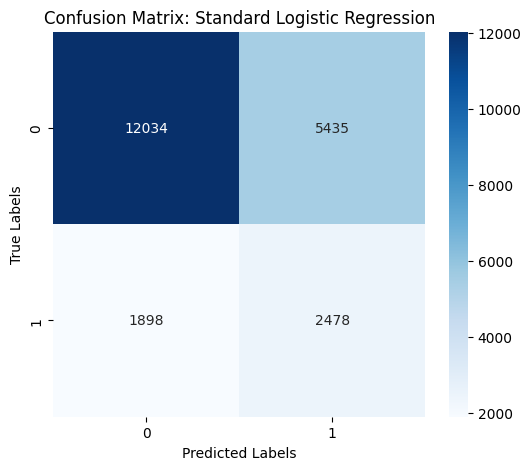

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_logreg)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix: Standard Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The image shows a confusion matrix for a Standard Logistic Regression model, illustrating its classification performance. The matrix has four key values: 12,034 true negatives (correctly predicted 0), 5,435 false positives (incorrectly predicted 1), 1,898 false negatives (incorrectly predicted 0), and 2,478 true positives (correctly predicted 1). The darker color intensity represents higher counts, emphasizing the distribution of predictions. This matrix provides insight into the model's performance, including metrics like accuracy, precision, recall, and F1-score, which can be derived to assess its classification effectiveness.

## 5.2: Additional Logistic Regression Models

We will now train and evaluate two additional logistic regression models. We had previously trained a standard logistic regression model, but now we will train regularized logistic regression models to observe whether adding a regularization term improves the test accuracy and f1 score: L2 regularization and L1 regularization. Ridge regularization (L2) to the logistic regression, which penalizes large coefficients, and evaluated its performance in the same way. Lastly, we trained a Lasso regularization (L1) logistic regression model, which encourages sparsity by reducing some coefficients to zero, and evaluated its results. For each model, the performance metrics, including accuracy, F1-score, and a detailed classification report, were printed to compare their effectiveness in predicting the target variable.

In [ ]:
# Ridge Regularization (L2)
ridge_logreg = LogisticRegression(penalty='l2', class_weight='balanced', random_state=42, max_iter=1000)
ridge_logreg.fit(X_train_scaled, y_train)

# Predict and evaluate Ridge
y_pred_ridge = ridge_logreg.predict(X_test_scaled)
print("Ridge Regularization")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("F1-Score:", f1_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

# Lasso Regularization (L1)
lasso_logreg = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', random_state=42, max_iter=1000)
lasso_logreg.fit(X_train_scaled, y_train)

# Predict and evaluate Lasso
y_pred_lasso = lasso_logreg.predict(X_test_scaled)
print("\nLasso Regularization")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("F1-Score:", f1_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

Ridge Regularization
Accuracy: 0.6643167772945754
F1-Score: 0.4032874928798112
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17469
           1       0.31      0.57      0.40      4376

    accuracy                           0.66     21845
   macro avg       0.59      0.63      0.58     21845
weighted avg       0.75      0.66      0.69     21845


Lasso Regularization
Accuracy: 0.6647745479514763
F1-Score: 0.4041012287411506
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17469
           1       0.31      0.57      0.40      4376

    accuracy                           0.66     21845
   macro avg       0.59      0.63      0.59     21845
weighted avg       0.75      0.66      0.69     21845



**Explanation of the Accuracy/Model:**

The model performance for all three logistic regression variations (Standard, Ridge, and Lasso regularization) is similar, with an accuracy of around 66% and an F1-score of approximately 0.40. While the precision for predicting no-shows (class 0) is high at 0.86, the recall for the same class is 0.69, showing that the model is reasonably good at identifying no-shows but still has room for improvement. For the "show" class (class 1), precision is low at 0.31, and recall is 0.57, indicating that the model struggles to correctly identify patients who show up. The macro average F1-score is 0.58, reflecting an overall decent but unbalanced performance, and the weighted average F1-score of 0.69 highlights the model's bias towards the majority class. These results suggest that while the model is effective for predicting no-shows, it needs improvement in predicting shows, especially in imbalanced datasets.

## Additional Baseline Modeling

We will now implement three additional models as explained in the beginning of the project file:  
2. Decision Tree Classifier
3. Random Forest Classifier
4. Extreme Gradient Boosting: XGBoost Classifier

Once we do so, we will observe their performance. Then, we will tune the models.

## 5.2 Decision Tree Classifier

For our second model, we chose the Decision Tree supervised learning model because it efficiently handles both numerical and categorical data with minimal preprocessing. It effectively captures non-linear relationships and feature interactions, while also offering insights into feature importance. Additionally, Decision Trees are widely used for classification tasks, making them a reliable choice for our analysis.

In [ ]:
dt_clf_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf_model.fit(X_train, y_train)
y_pred_dt = dt_clf_model.predict(X_test)
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.7123369192034791
F1-Score: 0.7195539770209008
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     17469
           1       0.31      0.36      0.33      4376

    accuracy                           0.71     21845
   macro avg       0.57      0.58      0.57     21845
weighted avg       0.73      0.71      0.72     21845



This model achieved an accuracy of 71.2% with an F1-score of 0.72. For class 0, the performance was strong, with a precision of 0.83, recall of 0.80, and F1-score of 0.82. However, for class 1, the performance was much weaker, with a precision of 0.31, recall of 0.36, and F1-score of 0.33. The macro average F1-score is 0.57, and the weighted average F1-score is 0.72, indicating that the model performs better on the majority class (class 0) but struggles with the minority class (class 1). The F1-score of 0.72 suggests an overall improvement in handling both classes compared to some earlier models.



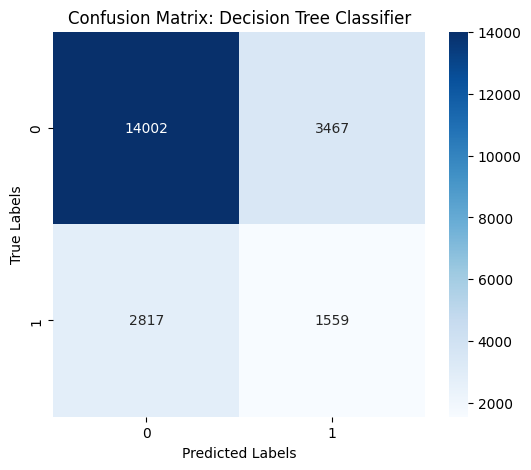

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_clf_model.classes_, yticklabels=dt_clf_model.classes_)
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The Decision Tree Classifier performs well in predicting no-shows (class 0) with an accuracy of 71%, achieving high precision (0.83) and recall (0.80) for this class. However, it struggles with predicting shows (class 1), with low precision (0.31) and recall (0.36), meaning it often incorrectly predicts that patients will not show up. The F1-score for class 1 is also low at 0.33, highlighting the model’s difficulty in correctly identifying the minority class. The macro average F1-score of 0.57 reflects overall moderate performance, while the weighted average of 0.72 shows better results when considering the class imbalance, suggesting the model is biased toward the majority class.

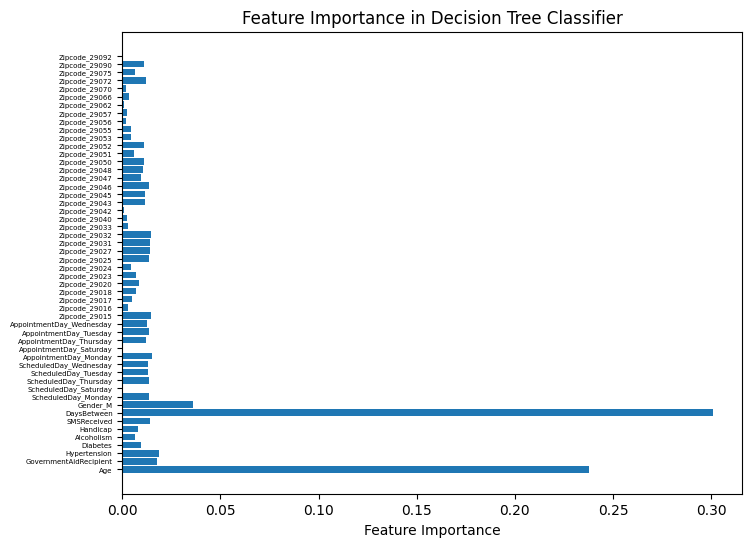

In [ ]:
# Feature Importance
importances = dt_clf_model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')

# Adjust y-axis font size
plt.tick_params(axis='y', which='major', labelsize=5)  # Change 8 to your desired font size

plt.show()


The image shows a bar chart of feature importance from a decision tree classifier, highlighting the significance of various features in the model's predictions. Among the most impactful features are "ScheduledDay_Monday" and "Age," which contribute the most to the decision-making process. Other features like "Hypertension" and "GovernmentalRecipient" also play moderate roles. In contrast, many zip code and appointment-related features have minimal importance, indicating they contribute little to the model's outcome. This visualization helps pinpoint which features are key drivers of the model's performance.


## 5.3 Random Forest Classifier

For our third model, we utilized a Random Forest classifier, as it enhances predictive accuracy and minimizes overfitting by combining multiple Decision Trees. This model effectively handles both numerical and categorical data while capturing complex feature interactions. It also offers valuable insights into feature importance, helping identify key predictors of patient no-shows. Furthermore, its robustness to noise and missing data makes it an ideal choice for real-world healthcare datasets.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.7657587548638133
F1-Score: 0.7457772355350673
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17469
           1       0.37      0.24      0.29      4376

    accuracy                           0.77     21845
   macro avg       0.60      0.57      0.58     21845
weighted avg       0.73      0.77      0.75     21845



The Random Forest Classifier achieved an accuracy of 76.6%, with an F1-score of 0.75. The model performed well for class 0, with a precision of 0.82, recall of 0.90, and F1-score of 0.86. However, for class 1, the performance was weaker, with a precision of 0.37, recall of 0.24, and an F1-score of 0.29. The macro average F1-score is 0.58, while the weighted average F1-score is 0.75, indicating that the model performs much better for class 0 but still faces significant challenges in correctly classifying the minority class (class 1).



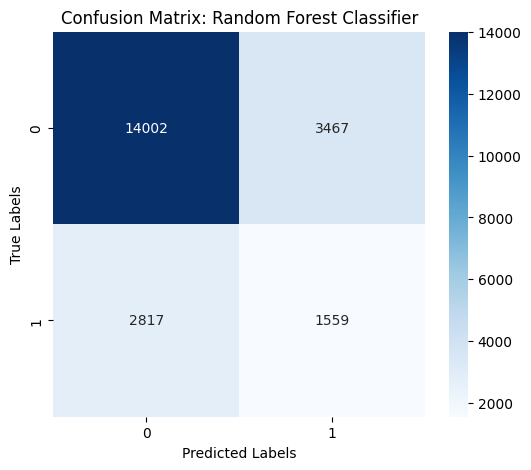

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix: Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.4 Extreme Gradient Boosting- XGBoost
The third model we selected is Extreme Gradient Boosting (XGBoost), a highly efficient machine learning algorithm tailored for supervised learning tasks such as regression, classification, and ranking problems. XGBoost constructs an ensemble of decision trees through a process of gradient boosting, which iteratively minimizes errors by learning from the mistakes of previous models. This model also incorporates regularization techniques to prevent overfitting and supports missing data handling, making it a powerful and versatile choice for complex predictive modeling tasks.


In [ ]:
# Calculate scale_pos_weight
neg_class = (y_train == 0).sum()
pos_class = (y_train == 1).sum()
scale_pos_weight = neg_class / pos_class

# Train XGBoost with scale_pos_weight
xgb_model = XGBClassifier(use_label_encoder=False, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:01:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.6146944380865187
F1-Score: 0.652929875032414
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     17469
           1       0.31      0.76      0.44      4376

    accuracy                           0.61     21845
   macro avg       0.61      0.67      0.57     21845
weighted avg       0.79      0.61      0.65     21845



The XGBoost model achieved an accuracy of 61.5%, with an F1-score of 0.65. For class 0, the model performed well with a precision of 0.91, but the recall was lower at 0.58, resulting in an F1-score of 0.71. For class 1, the precision was 0.31, but the recall was much higher at 0.76, leading to an F1-score of 0.44. The macro average F1-score is 0.57, and the weighted average F1-score is 0.65, indicating better overall performance for class 0. However, the model still struggles with the minority class (class 1), despite the higher recall.

## Finetuning

Now that we have completed our initial 4 models, we will now tune the hyperparameters to observe whether would enable us to have a higher test accuracy. We are tuning all of our models using Randomized Search, as we had observed was a good industry practice in class.

We will go in the following order (same as above)
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost Classifier

For finetuning, we will use a train-validation-test split.

## 5.5: Tuned Logistic Regression

1. Logistic Regression


*   penalty: Type of regularization (l1 or l2).
Why: Regularization helps prevent overfitting by penalizing large coefficients.Tuning ensures the best type of regularization for the dataset.
*   C: Regularization strength.
Why: Determines how much penalty is applied for large coefficients.
Tuning balances bias (underfitting) and variance (overfitting).

*   solver: Optimization algorithm.
Why: Different solvers support different penalties and datasets.
*   class_weight: Balancing class importance (balanced or None).
Why: Handles imbalanced datasets by giving minority class higher weight.



In [ ]:
# Define the hyperparameters distribution for tuning
param_dist = {
    'penalty': ['l1', 'l2'],  # Reduced to only test L1 and L2 penalties
    'C': np.logspace(-2, 0, 3),  # Narrowed range for regularization strength
    'solver': ['saga'],  # Suitable solver for L1 and L2
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')

# Use RandomizedSearchCV to perform hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=5,  # Fewer combinations to check
    cv=3,  # Reduced to 3-fold cross-validation
    scoring='f1',  # Scoring based on F1-Score
    verbose=1,  # Show progress
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=42,  # Ensure reproducibility
)

# Train the model on the training set with hyperparameter tuning
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

# Use the best model found by RandomizedSearchCV to make predictions
best_logreg = random_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test_scaled)

# Evaluate the model performance
print("Best Logistic Regression Model with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_best_logreg))
print("F1-Score:", f1_score(y_test, y_pred_best_logreg))
print(classification_report(y_test, y_pred_best_logreg))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
Best Logistic Regression Model with Hyperparameter Tuning
Accuracy: 0.6653238727397573
F1-Score: 0.4030374785661795
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17469
           1       0.31      0.56      0.40      4376

    accuracy                           0.67     21845
   macro avg       0.59      0.63      0.59     21845
weighted avg       0.75      0.67      0.69     21845



This displays the evaluation results of a Logistic Regression model with hyperparameter tuning, where the best hyperparameters found are solver='saga', penalty='l2', and C=0.01. The model achieves an accuracy of 66.53% and an F1-score of 0.40. For class 0, precision is high (0.86), but recall is moderate (0.69), while for class 1, precision is lower (0.31) and recall is higher (0.56), resulting in an F1-score of 0.40. The overall metrics show that the model performs better on the majority class, with macro and weighted averages of precision, recall, and F1-score indicating some imbalance, especially for class 1.

## 5.6: Tuned Decision Tree Classifier


2. Decision Tree

*   max_depth: Maximum depth of the tree.
Why: Limits overfitting by controlling the complexity of the tree.
*   min_samples_split: Minimum samples required to split an internal node.
Why: Prevents overly deep trees by enforcing splits only when sufficient data is available.

*   class_weight: Balancing class importance.
Why: Corrects for class imbalance by weighting classes during split decisions.


In [ ]:
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt_clf_model = DecisionTreeClassifier(random_state=42)

# Use RandomizedSearchCV with a broader range and stratified cross-validation
random_search = RandomizedSearchCV(
    dt_clf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',  # Use f1_weighted for imbalanced datasets
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Train the model with the original unscaled training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best model found by RandomizedSearchCV to make predictions
best_dt_clf = random_search.best_estimator_
y_pred_best_dt = best_dt_clf.predict(X_test)

# Evaluate the model performance
print("Best Decision Tree Classifier with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("F1-Score:", f1_score(y_test, y_pred_best_dt, average='weighted'))
print(classification_report(y_test, y_pred_best_dt))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini', 'class_weight': None}
Best Decision Tree Classifier with Hyperparameter Tuning
Accuracy: 0.75898374914168
F1-Score: 0.7456770579980192
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     17469
           1       0.37      0.28      0.31      4376

    accuracy                           0.76     21845
   macro avg       0.60      0.58      0.58     21845
weighted avg       0.74      0.76      0.75     21845



The Best Decision Tree Classifier with Hyperparameter Tuning achieved an accuracy of 75.9%, with an F1-score of 0.75. For class 0, it showed strong performance with a precision of 0.83, recall of 0.88, and F1-score of 0.85. However, for class 1, the performance was much weaker, with a precision of 0.37, recall of 0.28, and an F1-score of 0.31. The macro average F1-score is 0.58, and the weighted average F1-score is 0.75, indicating that while class 0 is well-handled, the model still struggles with the minority class (class 1), despite the hyperparameter tuning.

## 5.7: Tuned Random Forest Classifier

3. Random Forest


*   n_estimators: Number of decision trees.
Why: More trees improve stability but increase computation time.
*   max_depth: Maximum depth of each tree.
Why: Controls overfitting by limiting complexity.
*   class_weight: Balancing class importance.
Why: Ensures that minority class predictions are not ignored.
*   max_features: Number of features considered for the best split.
Why: Introduces randomness to prevent overfitting and improve generalization.


In [ ]:
param_dist = {
    'n_estimators': [50, 100],  # Fewer options for number of trees
    'max_depth': [10, 20, None],  # Focus on a narrower range of depths
    'min_samples_split': [2, 10],  # Reduce options for split criteria
    'min_samples_leaf': [1, 4],  # Reduce options for minimum samples in leaf
    'max_features': ['sqrt'],  # Focus on 'sqrt', a common good default
    'bootstrap': [True],  # Fix to True (common for Random Forest)
    'class_weight': ['balanced'],  # Fix to balanced for imbalanced datasets
    'criterion': ['gini']  # Use only Gini (faster than entropy)
}

# Initialize the Random Forest Classifier
rf_clf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV with fewer iterations and reduced complexity
random_search = RandomizedSearchCV(
    rf_clf_model,
    param_distributions=param_dist,
    n_iter=10,  # Reduce the number of sampled parameter combinations
    cv=3,  # Reduce cross-validation folds
    scoring='f1_weighted',  # Use weighted F1 score for imbalanced datasets
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Train the model with the original unscaled training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best model found by RandomizedSearchCV to make predictions
best_rf_clf = random_search.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)

# Evaluate the model performance
print("Best Random Forest Classifier with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("F1-Score:", f1_score(y_test, y_pred_best_rf, average='weighted'))
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Best Random Forest Classifier with Hyperparameter Tuning
Accuracy: 0.7656214236667429
F1-Score: 0.7451775584334928
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17469
           1       0.37      0.24      0.29      4376

    accuracy                           0.77     21845
   macro avg       0.60      0.57      0.57     21845
weighted avg       0.73      0.77      0.75     21845



The Best Random Forest Classifier with Hyperparameter Tuning achieved an accuracy of 76.6%, with an F1-score of 0.75. For class 0, the model performed well with a precision of 0.82, recall of 0.90, and F1-score of 0.86. However, for class 1, the performance was weaker, with a precision of 0.37, recall of 0.24, and an F1-score of 0.29. The macro average F1-score is 0.57, while the weighted average F1-score is 0.75, indicating that the model is strong for class 0 but still struggles with class 1 despite the hyperparameter tuning.



## 5.8: Tuned XGBoost Model

4. XGBoost


*   max_depth: Maximum depth of each tree.
Why: Balances learning complex patterns without overfitting.
*   earning_rate: Step size for weight updates.
Why: Smaller rates improve generalization but require more boosting rounds.

*   n_estimators: Number of boosting rounds.
Why: More rounds improve performance but risk overfitting.
*   scale_pos_weight: Balance of positive and negative class weights.
Why: Handles class imbalance by increasing the impact of the minority class.

*   subsample: Fraction of samples used for training each tree.
Why: Introduces randomness for better generalization.
*   colsample_bytree: Fraction of features used to build each tree.
Why: Ensures diversity in tree splits to prevent overfitting.



In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples for training
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features for training
    'gamma': [0, 1, 5],  # Minimum loss reduction for splits
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization strength
    'reg_lambda': [1, 1.5, 2],  # L2 regularization strength
    'scale_pos_weight': [1, 2, 10]  # Balances positive/negative class imbalance
}

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')

# Use RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',  # Use F1 weighted for imbalanced datasets
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Train the model with the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best model found by RandomizedSearchCV to make predictions
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model performance
print("Best XGBoost Classifier with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("F1-Score:", f1_score(y_test, y_pred_best_xgb, average='weighted'))
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:07:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'subsample': 0.6, 'scale_pos_weight': 2, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best XGBoost Classifier with Hyperparameter Tuning
Accuracy: 0.7675440604257268
F1-Score: 0.759971767167602
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     17469
           1       0.41      0.34      0.37      4376

    accuracy                           0.77     21845
   macro avg       0.62      0.61      0.61     21845
weighted avg       0.75      0.77      0.76     21845



The Best XGBoost Classifier with Hyperparameter Tuning achieved an accuracy of 76.8%, with an F1-score of 0.76. For class 0, the model performed well with a precision of 0.84, recall of 0.87, and F1-score of 0.86. However, for class 1, the performance was weaker, with a precision of 0.41, recall of 0.34, and an F1-score of 0.37. The macro average F1-score is 0.61, and the weighted average F1-score is 0.76, indicating that while the model is strong for class 0, it still faces challenges with class 1 despite the hyperparameter tuning. The hyperparameters used include a subsample of 0.6, scale_pos_weight of 2, reg_lambda of 1, and others that improved the overall performance.

# Part 6: Comparison of Classification Metrics Across Models

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score # Import recall_score and precision_score
# Define models and predictions
models = [
    ("Logistic Regression", logreg, X_test_scaled, y_pred_logreg),
    ("Decision Tree", dt_clf_model, X_test, y_pred_dt),
    ("Random Forest", rf_model, X_test, y_pred_rf),
    ("XGBoost", xgb_model, X_test, y_pred_xgb)
]

# Initialize lists to hold metrics
model_names = []
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through models to calculate metrics
for name, model, X_test_data, y_pred in models:
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))

# Create a DataFrame for metrics
data = {
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions
}

model_df = pd.DataFrame(data)

In [ ]:
# Initialize lists to hold metrics for tuned models
tuned_model_names = []
tuned_accuracies = []
tuned_f1_scores = []
tuned_recalls = []
tuned_precisions = []

# Add metrics for each tuned model, including XGBoost
tuned_models = [
    ("Tuned Logistic Regression", best_logreg, X_test_scaled, y_pred_best_logreg),
    ("Tuned Decision Tree", best_dt_clf, X_test, y_pred_best_dt),
    ("Tuned Random Forest", best_rf_clf, X_test, y_pred_best_rf),
    ("Tuned XGBoost", best_xgb, X_test, y_pred_best_xgb)
]

# Calculate metrics dynamically
for name, model, X_test_data, y_pred in tuned_models:
    tuned_model_names.append(name)
    tuned_accuracies.append(accuracy_score(y_test, y_pred))
    tuned_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    tuned_recalls.append(recall_score(y_test, y_pred, average='weighted'))
    tuned_precisions.append(precision_score(y_test, y_pred, average='weighted'))

# Create a DataFrame for tuned model metrics
tuned_data = {
    'Model': tuned_model_names,
    'Accuracy': tuned_accuracies,
    'F1 Score': tuned_f1_scores,
    'Recall': tuned_recalls,
    'Precision': tuned_precisions
}

tuned_model_df = pd.DataFrame(tuned_data)

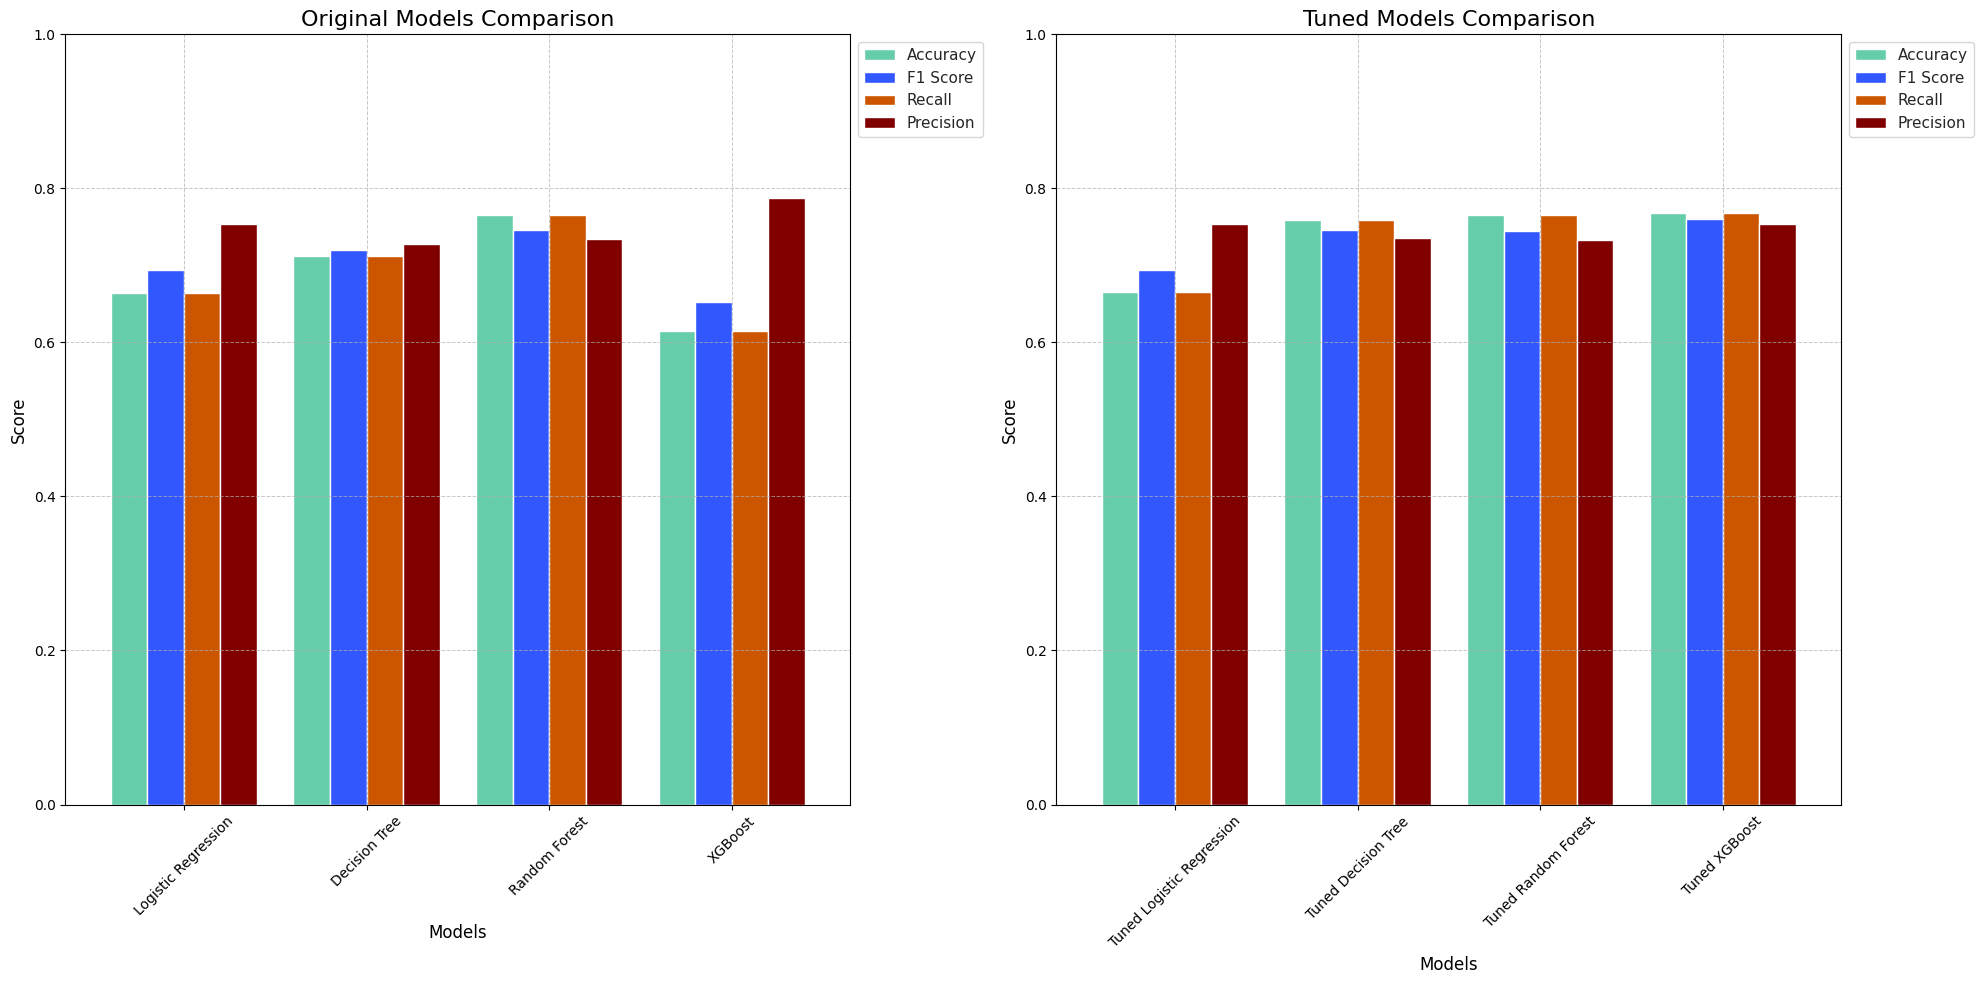

In [ ]:
# Plotting both original and tuned models side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with two subplots
sns.set_theme(style="whitegrid")

# Colors for the bars
original_colors = ['#66CDAA', '#3357FF', '#CC5500', '#800000']
tuned_colors = ['#66CDAA', '#3357FF', '#CC5500', '#800000']

# Plot for original models
model_df.set_index('Model').plot(
    kind='bar',
    width=0.8,
    color=original_colors,
    ax=axes[0]
)
axes[0].set_title('Original Models Comparison', fontsize=16)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_xticks(range(len(model_df)))
axes[0].set_xticklabels(model_df['Model'], rotation=45)
axes[0].set_ylim(0, 1)
axes[0].grid(True, axis='both', linestyle='--', linewidth=0.7, alpha=0.7)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot for tuned models
tuned_model_df.set_index('Model').plot(
    kind='bar',
    width=0.8,
    color=tuned_colors,
    ax=axes[1]
)
axes[1].set_title('Tuned Models Comparison', fontsize=16)
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_xticks(range(len(tuned_model_df)))
axes[1].set_xticklabels(tuned_model_df['Model'], rotation=45)
axes[1].set_ylim(0, 1)
axes[1].grid(True, axis='both', linestyle='--', linewidth=0.7, alpha=0.7)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

The plots depict the performance comparison of our four machine learning models—Logistic Regression, Decision Tree, Random Forest, and XGBoost—evaluated using Accuracy, F1 Score, Recall, and Precision as metrics. The left plot, titled "Original Models Comparison," shows the baseline performance of the models with default hyperparameters, while the right plot, "Tuned Models Comparison," illustrates their performance after hyperparameter tuning.

After tuning our models. we observed that the regular Logistic Regression model and the regular Random Forest model stayed relatively the same, but we saw greater improvements in the Decision Tree classifier and the XGBoost model post-tuning.

Among the pre-tuned models, the Random Forest Model stands out as the strongest performer in terms of Accuracy, F1 Score, and Recall, making it the best default model. It is slightly behind XGBoost in terms of Precision. After hyperparameter tuning, the most remarkable improvements are observed in the XGBoost model. Its accuracy and F1 Score, and Recall see substantial increases, indicating that tuning has been optimized its and reduced overfitting or underfitting tendencies. Logistic Regression sees moderate gains across all metrics, becoming more balanced in its predictions but still trailing behind Random Forest and XGBoost.

# Part 7: Additional Unsupervised Learning: PCA: Applied to Logistic Regression



In this stage, we applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining 90% of the variance. This transformation was applied to both the training and test datasets to create new, lower-dimensional representations of the data. We then visualized the results using 2D and 3D plots. The 2D plot shows the first two principal components, with points colored based on the target class, offering a visual representation of how the data is distributed across these two components. The 3D plot extends this visualization to the first three principal components, providing a more detailed view of the data's structure and relationships in three dimensions. These plots help us better understand the variance and separation in the data, guiding further analysis or model development.

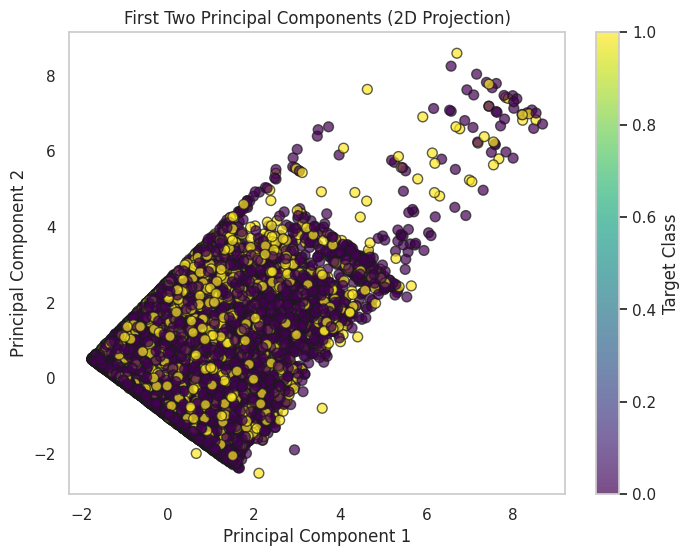

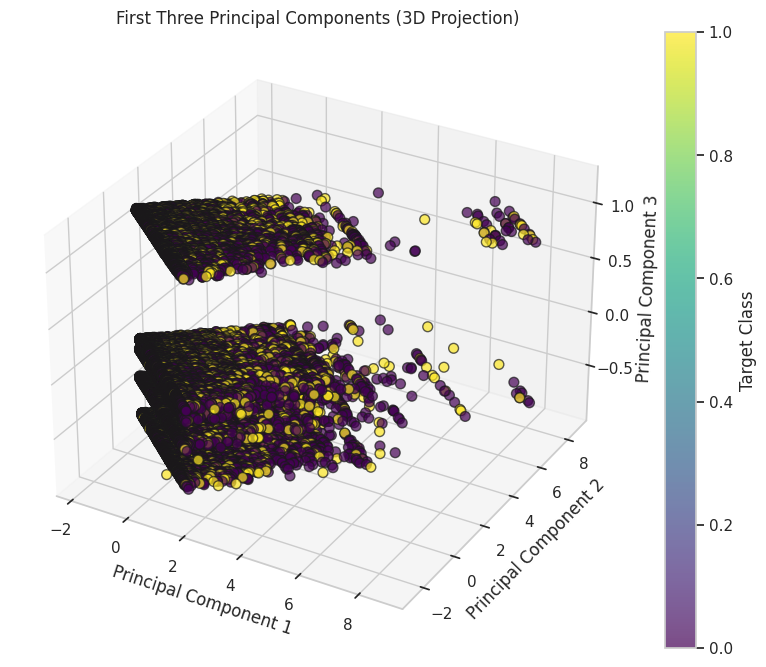

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.90)  # Retain 90% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# 2D Plot for the First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title("First Two Principal Components (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Target Class")
plt.grid()
plt.show()

# 3D Plot for the First Three Principal Components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
ax.set_title("First Three Principal Components (3D Projection)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label="Target Class")
plt.show()

In [ ]:
# Check the explained variance ratio
print("Explained variance by components:", pca.explained_variance_ratio_)
print("Number of components chosen:", pca.n_components_)

Explained variance by components: [0.21629272 0.20149675 0.09135554 0.0849017  0.06971747 0.04523841
 0.0346518  0.02613824 0.02073511 0.01753758 0.01544334 0.01396713
 0.01273567 0.01190874 0.0111407  0.01057288 0.01011825 0.00999752]
Number of components chosen: 18



In this stage, we trained a Logistic Regression model on the PCA-transformed data, using the previously reduced features from the first few principal components. After fitting the model to the training data, we evaluated its performance on the test set by predicting the target variable and calculating the accuracy, F1-score, and providing a classification report. The confusion matrix was also computed to visualize the model's performance in terms of true positives, false positives, true negatives, and false negatives. A heatmap was then created for the confusion matrix, offering a clear visual representation of the model's ability to classify the target variable, showing where the model made correct or incorrect predictions.

Logistic Regression with PCA
Accuracy: 0.6663309681849393
F1-Score: 0.4020999097695021
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17469
           1       0.31      0.56      0.40      4376

    accuracy                           0.67     21845
   macro avg       0.59      0.63      0.59     21845
weighted avg       0.75      0.67      0.70     21845



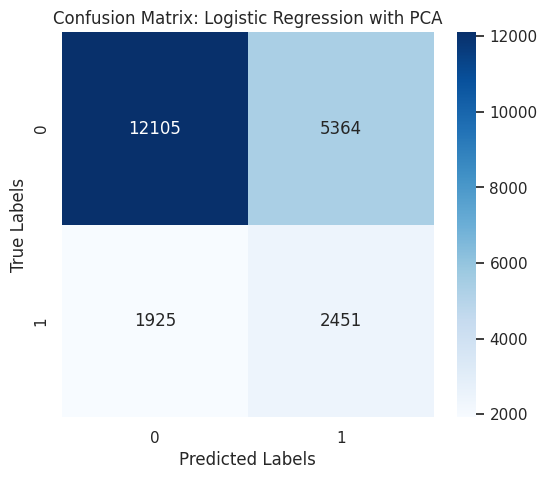

In [ ]:
# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)

# Predict and evaluate Logistic Regression with PCA
y_pred_pca = logreg_pca.predict(X_test_pca)

print("Logistic Regression with PCA")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("F1-Score:", f1_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Create a heatmap for Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_pca.classes_, yticklabels=logreg_pca.classes_)
plt.title('Confusion Matrix: Logistic Regression with PCA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

This confusion matrix, paired with classification metrics, evaluates the performance of a Logistic Regression model applied with Principal Component Analysis (PCA). The accuracy is 66.63%, indicating the percentage of correct predictions overall. The F1-score is 0.40, highlighting a moderate balance between precision (0.31) and recall (0.56) for class 1. The model performs well for class 0, with a high precision (0.86) and moderate recall (0.69), but struggles with class 1, which suffers from poor precision and moderate recall. This suggests that while the model is generally effective for identifying the majority class (0), it has difficulty accurately classifying the minority class (1), leading to potential imbalances in performance.

# Part 8: Results Summary

In this project, we conducted a comprehensive performance analysis of four machine learning models—Logistic Regression, Decision Tree, Random Forest, and XGBoost—using Accuracy, F1 Score, Precision, and Recall as evaluation metrics. The models were assessed both with default hyperparameters and after hyperparameter tuning to determine their strengths and limitations.

Key Findings:
- Pre-tuned Models: The Random Forest model emerged as the best performer in the default configuration, excelling in Accuracy, F1 Score, and Recall. However, its Precision for the minority class (class 1) was slightly lower. XGBoost showed promise with its precision-oriented performance but fell short in overall metrics compared to Random Forest.
- Post-tuned Models: Hyperparameter tuning yielded notable improvements in the XGBoost model, which achieved the highest overall performance post-tuning, with an accuracy of 76.8% and a weighted F1-score of 0.76. While it performed well on the majority class (class 0),the precision was 0.41 and F1-score was 0.76. The Random Forest model, with an accuracy of 76.6% and a weighted F1-score of 0.75, demonstrated balanced improvements post-tuning but faced challenges similar to XGBoost in handling class 1. The Decision Tree model showed moderate gains, achieving an accuracy of 75.9% and a weighted F1-score of 0.75, but its class 1 performance remained weak. The Logistic Regression model had the lowest overall performance, with limited gains from tuning. It achieved an accuracy of 66.5% and a weighted F1-score of 0.69, reflecting its challenges in handling class 1 predictions effectively.

The XGBoost model stands out as the most robust classifier after hyperparameter tuning, delivering strong performance across most metrics and substantial gains in accuracy and recall. However, all models faced difficulties with class 1, emphasizing the need for further optimization or advanced techniques such as class balancing or ensemble strategies to address the class imbalance. The project highlights the importance of hyperparameter tuning and its impact on enhancing model performance, particularly for complex algorithms like XGBoost.

# Part 8: Challenges/Obstacles Faced


The dataset used in our analysis exhibited a significant class imbalance, with "No-shows" being much fewer than "Shows." To address this, we stratified our data split based on the no-show variable to ensure proportional representation in training and testing. Additionally, we incorporated class weights during model training to mitigate the imbalance's impact. Despite these efforts, the limited dataset size constrained the model's overall performance. Furthermore, the dataset lacked potentially critical features, such as socioeconomic data, which could have enhanced our ability to predict no-shows accurately. Another limitation is the dataset’s geographic scope, as it was restricted to Vitoria. Patients with longer intervals between appointment booking and attendance might have sought care in neighboring cities or at healthcare institutions outside Vitoria. Finally, it is important to note that healthcare in Brazil is free, which may influence appointment adherence, as individuals may not perceive as strong an obligation to attend their appointments compared to settings where healthcare is a direct financial investment.

# Part 8: Potential Next Steps

To enhance the predictive power and generalizability of our models, future work should focus on gathering data from multiple hospitals or regions, incorporating more diverse patient demographics and socioeconomic factors. Including socioeconomic features in the dataset could provide valuable insights into the underlying factors contributing to medical appointment no-shows. Additionally, exploring alternative modeling approaches, such as unsupervised learning techniques, could uncover hidden patterns or clusters within the data. To make our findings actionable, we recommend developing an interactive dashboard for hospital staff. This dashboard could help prioritize patients at higher risk of no-shows, enabling targeted interventions to improve attendance rates and optimize resource allocation.

# Part 10: Conclusion

In this project, we implemented a comprehensive data analysis pipeline, training binary classification machine learning models to predict medical appointment no-shows. Our efforts included optimizing model performance through hyperparameter tuning and leveraging advanced techniques such as class balancing and ensemble strategies. Despite these measures, accurately predicting the minority class—the no-shows—remained challenging, highlighting the limitations imposed by class imbalance and the need for further refinement of our approach. Importantly, we prioritized recall as a key metric, given its critical role in identifying potential no-shows for targeted interventions. This project underscores the importance of a well-structured data analysis pipeline, the value of hyperparameter tuning for optimizing complex models, and the potential of predictive analytics to enhance healthcare delivery. Our findings suggest that predictive models, when further improved, could enable healthcare providers to better anticipate no-shows, streamline resource allocation, and reduce patient wait times, ultimately contributing to more efficient and effective patient care.